In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8760\2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:

# Set display options for large datasets
pd.set_option('display.max_columns', None)

# Load CSV in chunks if necessary
def load_data(file_path, nrows=500000):
    return pd.read_csv(file_path, nrows=nrows, parse_dates=['pickup_datetime'])

# Basic Info & Cleaning
def inspect_data(df):
    print("\nDataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDuplicated Rows:", df.duplicated().sum())
    print("\nBasic Statistics:")
    print(df.describe())



In [4]:
# Feature Engineering
def preprocess_data(df):
    df['hour'] = df['pickup_datetime'].dt.hour
    df['day'] = df['pickup_datetime'].dt.day
    df['month'] = df['pickup_datetime'].dt.month
    df['weekday'] = df['pickup_datetime'].dt.weekday
    df['year'] = df['pickup_datetime'].dt.year
    df = df.dropna()
    df = df.drop(columns=['User ID', 'User Name', 'Driver Name'])  # Removing non-informative columns
    return df



In [5]:
# Univariate Analysis
def univariate_analysis(df):
    print("\nHistograms for Numerical Features:")
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    df[numerical_columns].hist(bins=30, figsize=(20, 15), color='green')
    plt.show()
    # fig, axes = plt.subplots(9, 3, figsize=(18, 30))
    # axes = axes.flatten()
    
    # for i, column in enumerate(df.columns):
    #     if df[column].dtype == 'object':
    #         sns.countplot(y=df[column], ax=axes[i])
    #         axes[i].set_title(f"{column} Count")
    #     elif df[column].dtype in ['int64', 'float64']:
    #         sns.histplot(df[column], bins=50, ax=axes[i], kde=True)
    #         axes[i].set_title(f"{column} Distribution")
    #     elif df[column].dtype == 'datetime64[ns]':
    #         sns.histplot(df[column].dt.hour, bins=24, ax=axes[i], kde=True)
    #         axes[i].set_title(f"{column} Hour Distribution")
    
    # plt.tight_layout()
    # plt.show()

# Bivariate Analysis
def bivariate_analysis(df):
    correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Feature Correlations")
    plt.show()


In [6]:
def handle_outliers(df):    
    # Select only numerical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Create a copy of the original DataFrame for visualization
    df_original = df.copy()

    # Initialize a dictionary to store outlier counts
    outlier_counts = {}

    # Function to calculate outliers using IQR
    def detect_outliers_iqr(column):
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (column < lower_bound) | (column > upper_bound)


    # Replace outliers with log-transformed values and count outliers
    for column in numerical_columns:
        outliers = detect_outliers_iqr(df[column])
        df.loc[outliers, column] = None  # Replace outliers with log-transformed values
        outlier_counts[column] = outliers.sum()  # Store outlier count

    # Visualize the data before and after handling outliers
    for column in numerical_columns:
        # Create a figure with two subplots (before and after)
        plt.figure(figsize=(12, 6))
        # Boxplot before handling outliers (using original data)
        plt.subplot(1, 2, 1)
        plt.boxplot(df_original[column].dropna(), vert=False, boxprops=dict(color="green"), medianprops=dict(color="green"))
        plt.title(f'Before: {column}')
        plt.xlabel(column)
        # Boxplot after handling outliers (using modified data)
        plt.subplot(1, 2, 2)
        plt.boxplot(df[column].dropna(), vert=False, boxprops=dict(color="green"), medianprops=dict(color="green"))
        plt.title(f'After: {column}')
        plt.xlabel(column)
        # Show the plot
        plt.tight_layout()
        plt.show()
    return df


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 499979 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   User ID            499979 non-null  object        
 1   User Name          499979 non-null  object        
 2   Driver Name        499979 non-null  object        
 3   Car Condition      499979 non-null  object        
 4   Weather            499979 non-null  object        
 5   Traffic Condition  499979 non-null  object        
 6   key                499979 non-null  object        
 7   fare_amount        499979 non-null  float64       
 8   pickup_datetime    499979 non-null  datetime64[ns]
 9   pickup_longitude   499979 non-null  float64       
 10  pickup_latitude    499979 non-null  float64       
 11  dropoff_longitude  499974 non-null  float64       
 12  dropoff_latitude   499974 non-null  float64       
 13  passenger_count    499979 non-null

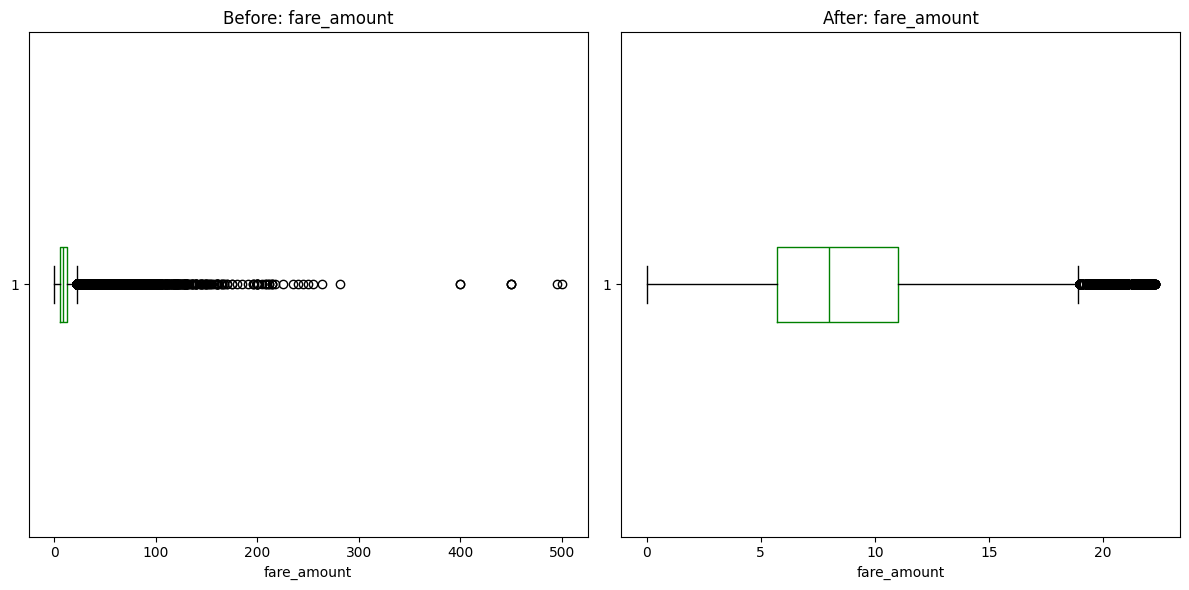

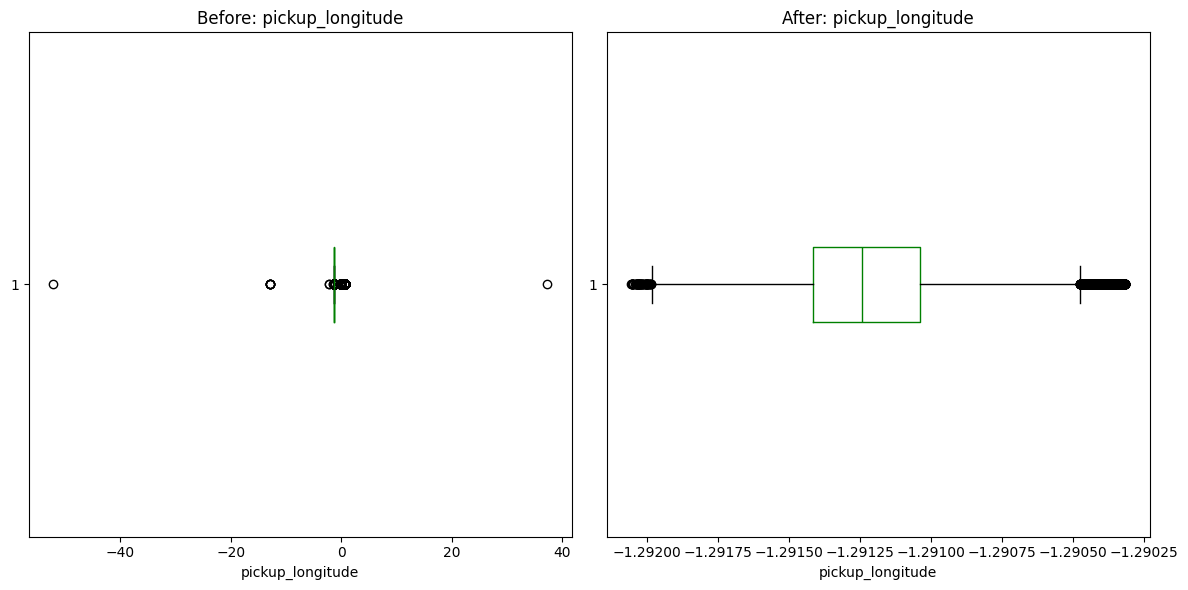

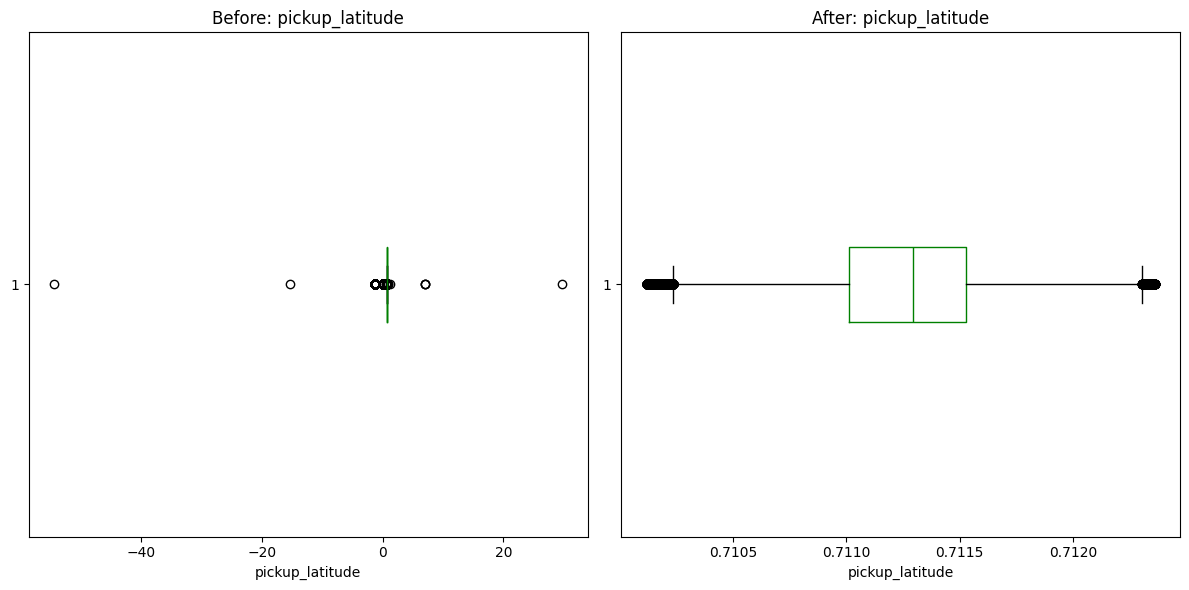

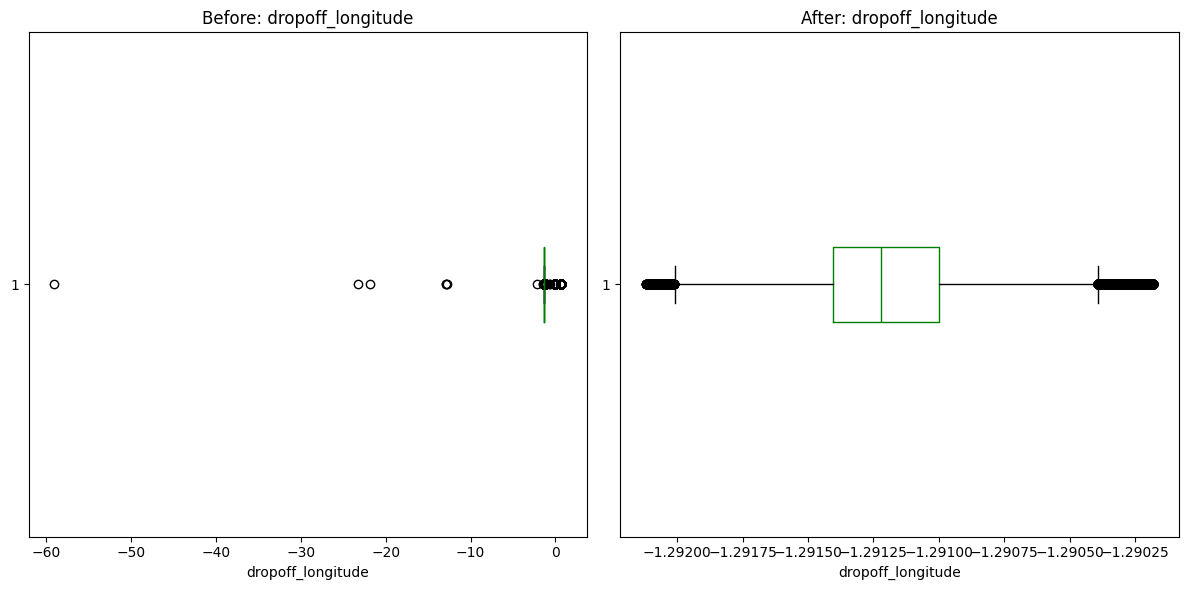

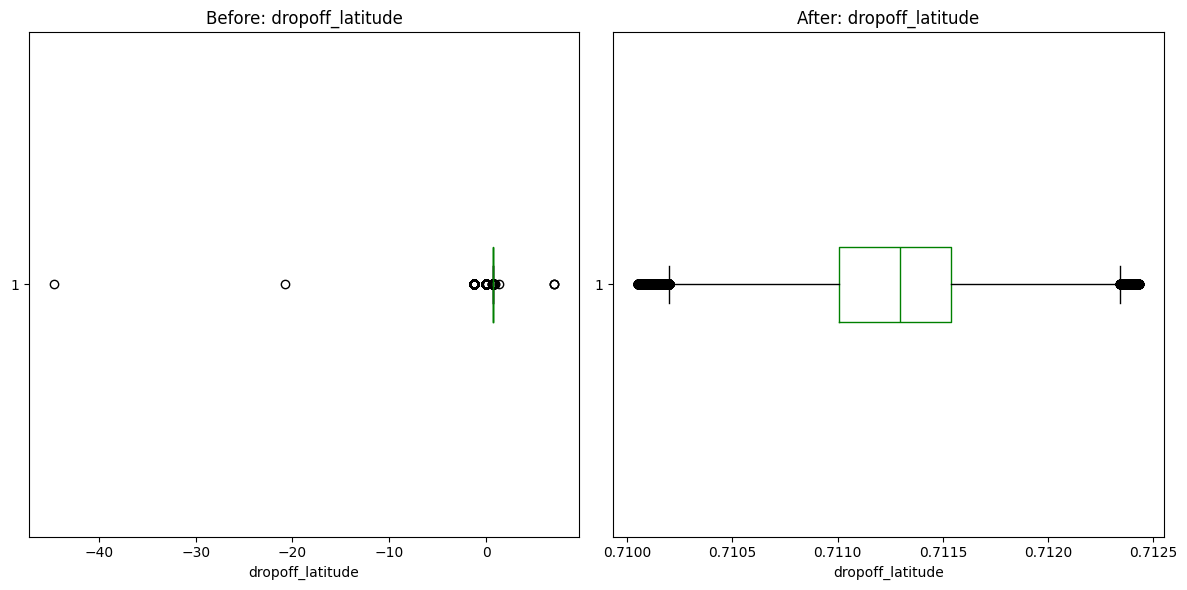

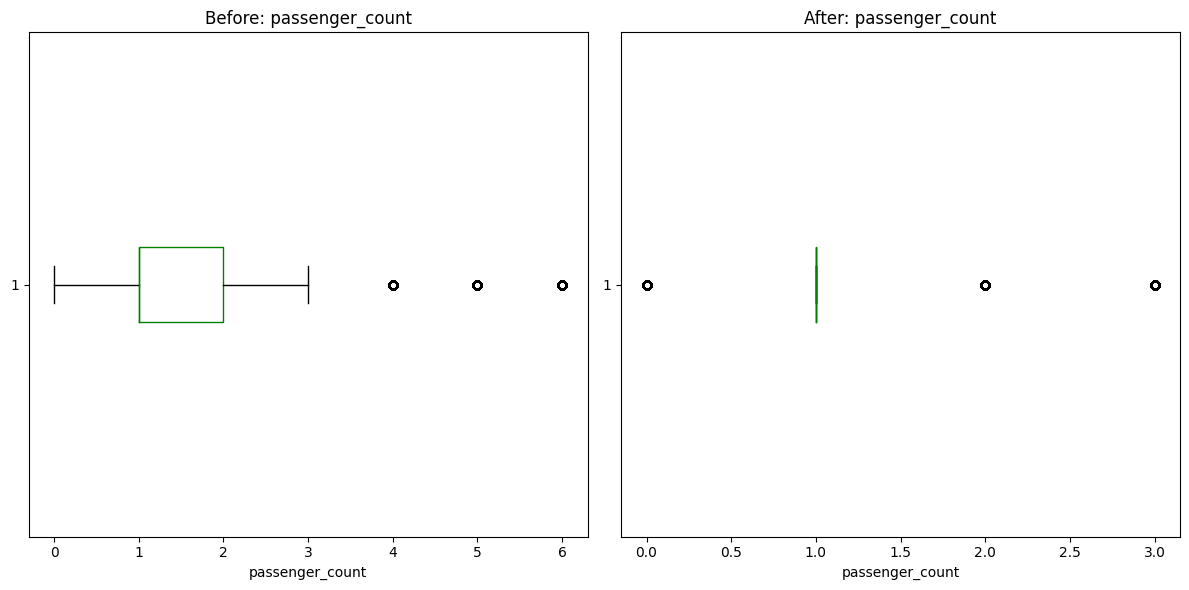

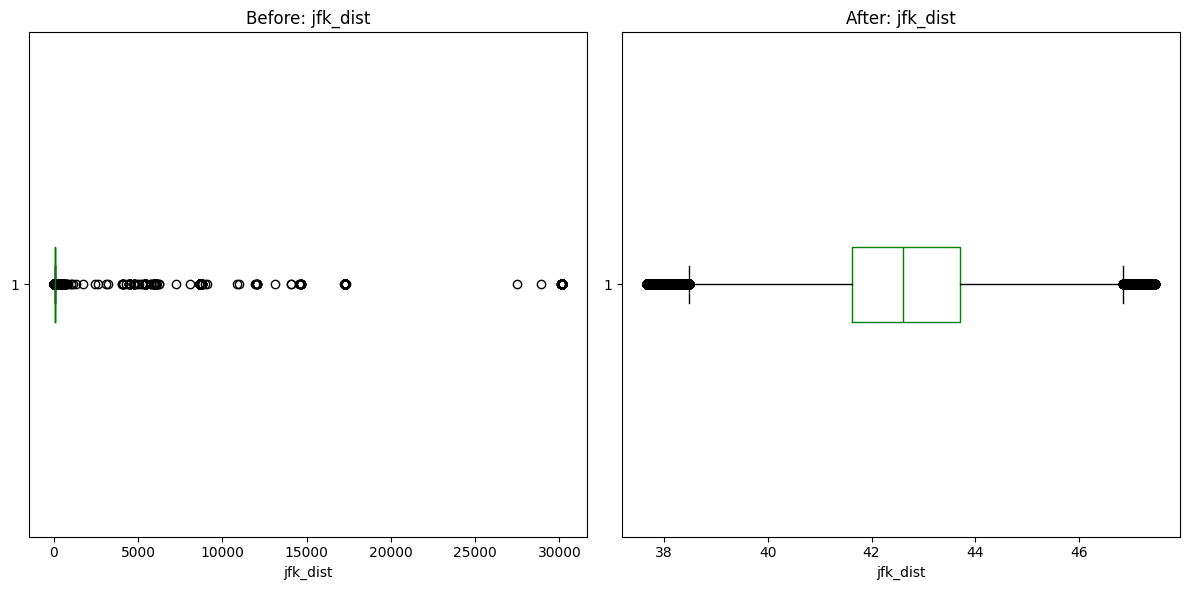

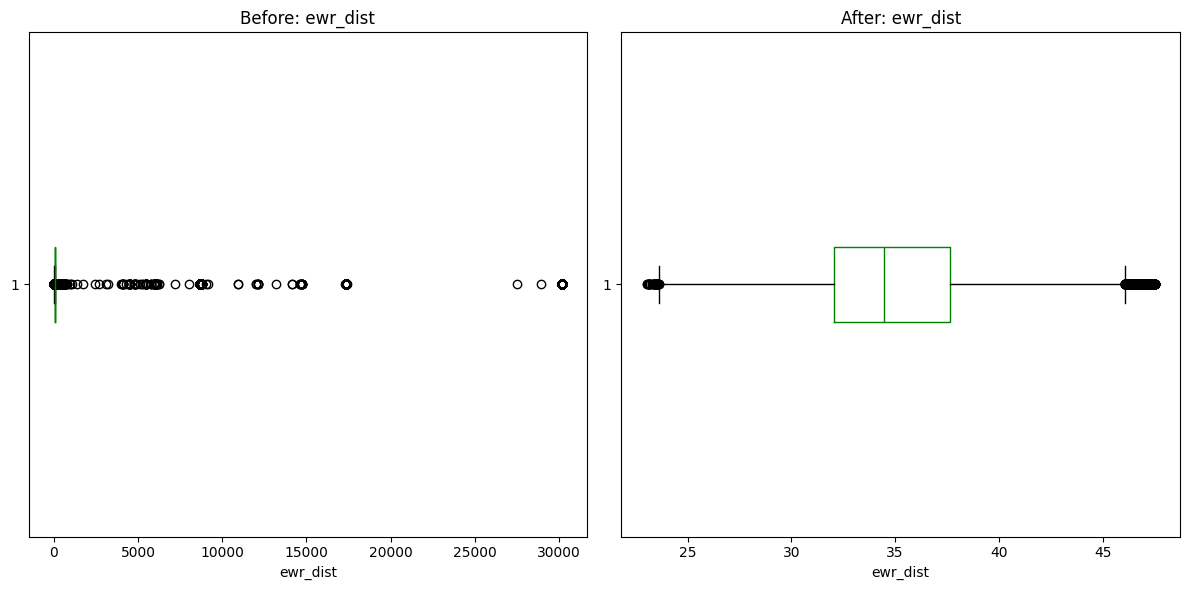

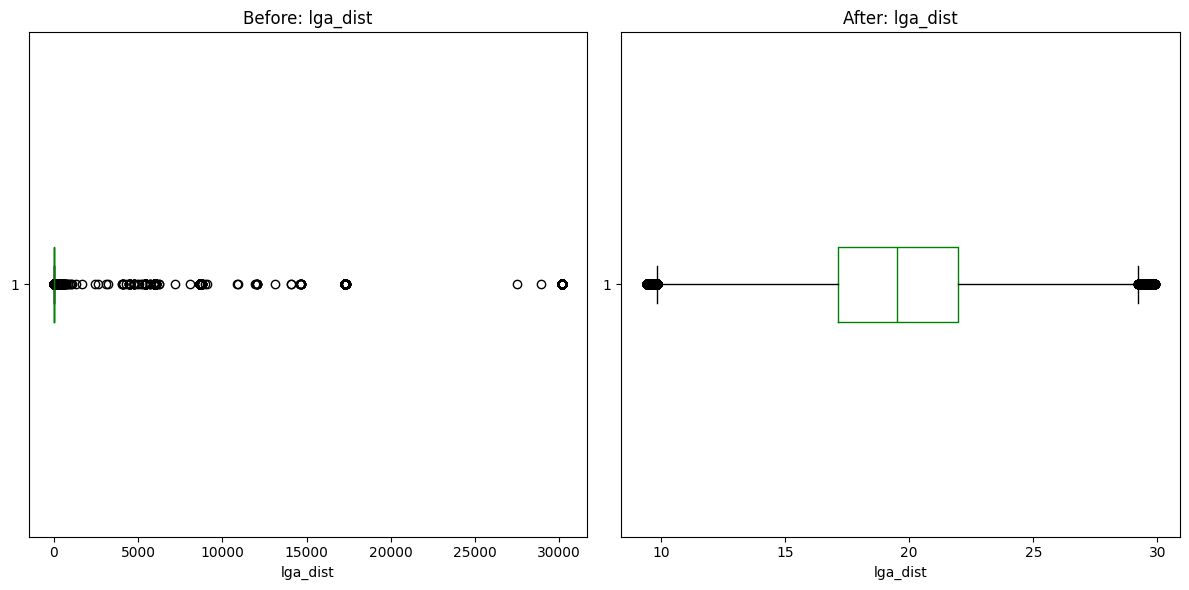

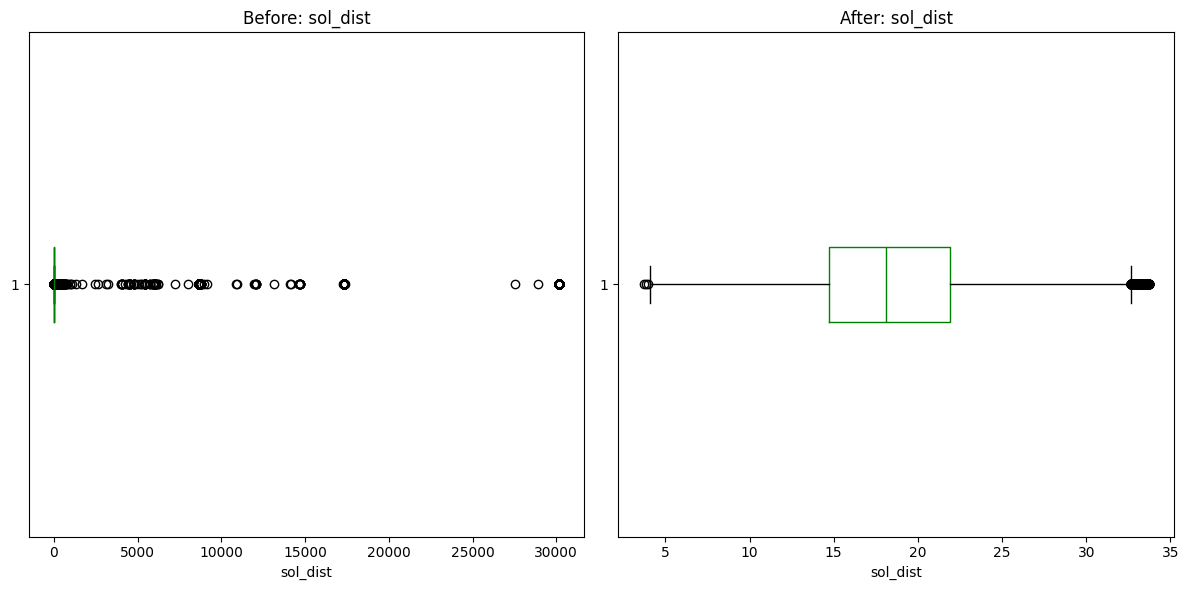

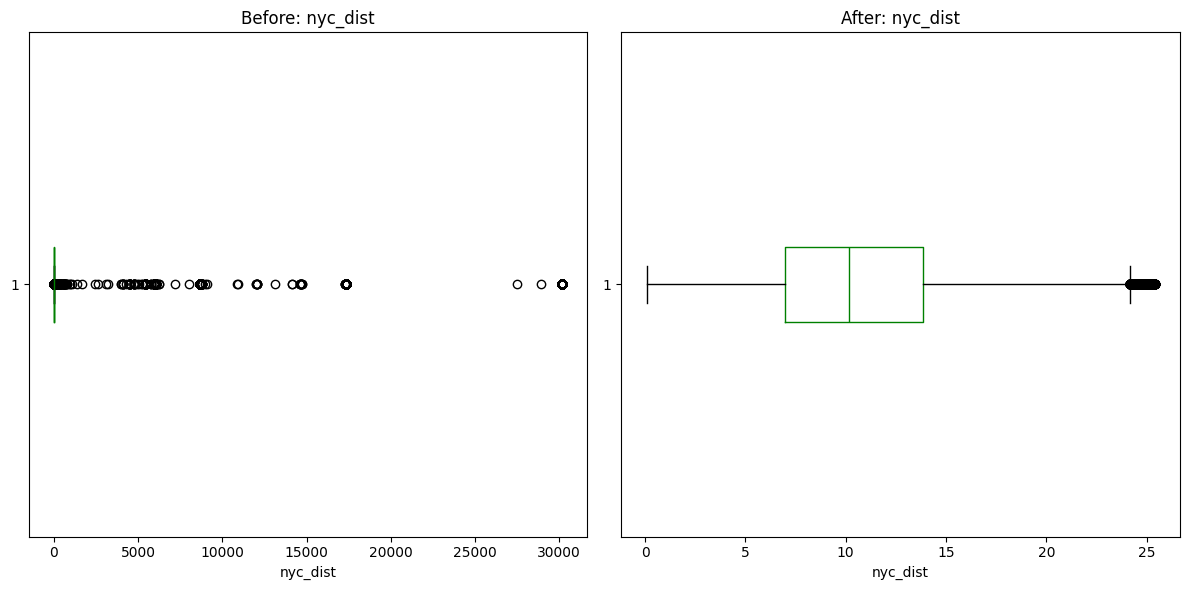

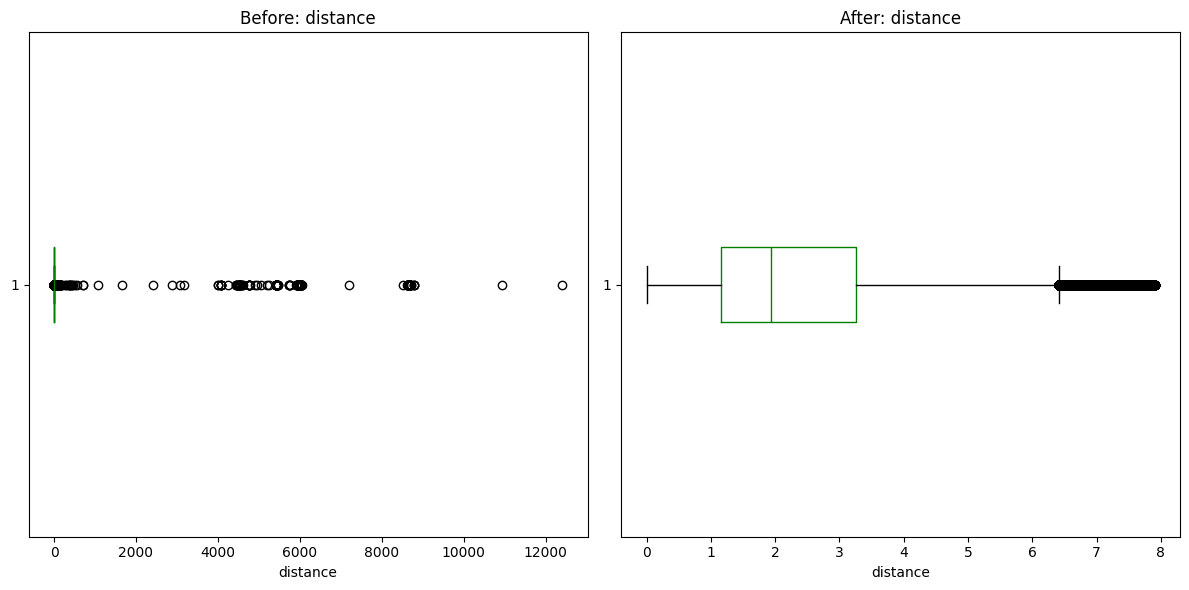

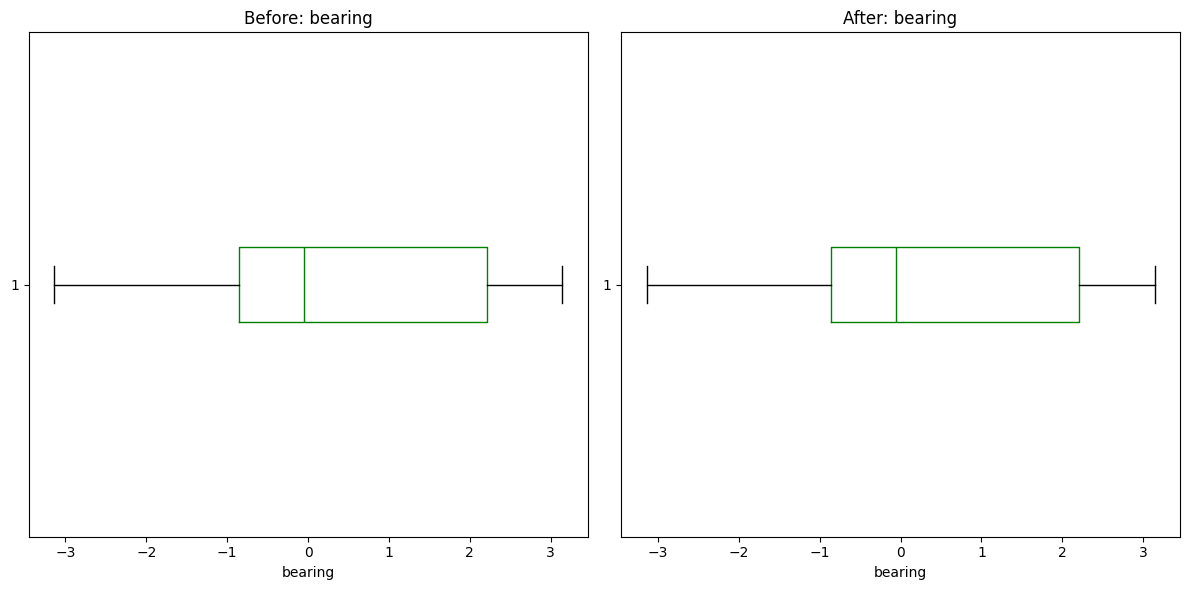

In [7]:
# Load Data
file_path = "final_internship_data.csv"  # Change this to your actual file path
df = load_data(file_path)
original_df = load_data(file_path)

# Remove negative fare amounts
df = df[df['fare_amount'] >= 0]

# Perform Analysis
inspect_data(df)
df = preprocess_data(df)

df = handle_outliers(df)

# # Save Processed Data for Dashboard
# processed_file = "processed_data.csv"
# df.to_csv(processed_file, index=False)
# print(f"Processed data saved as {processed_file}")



Histograms for Numerical Features:


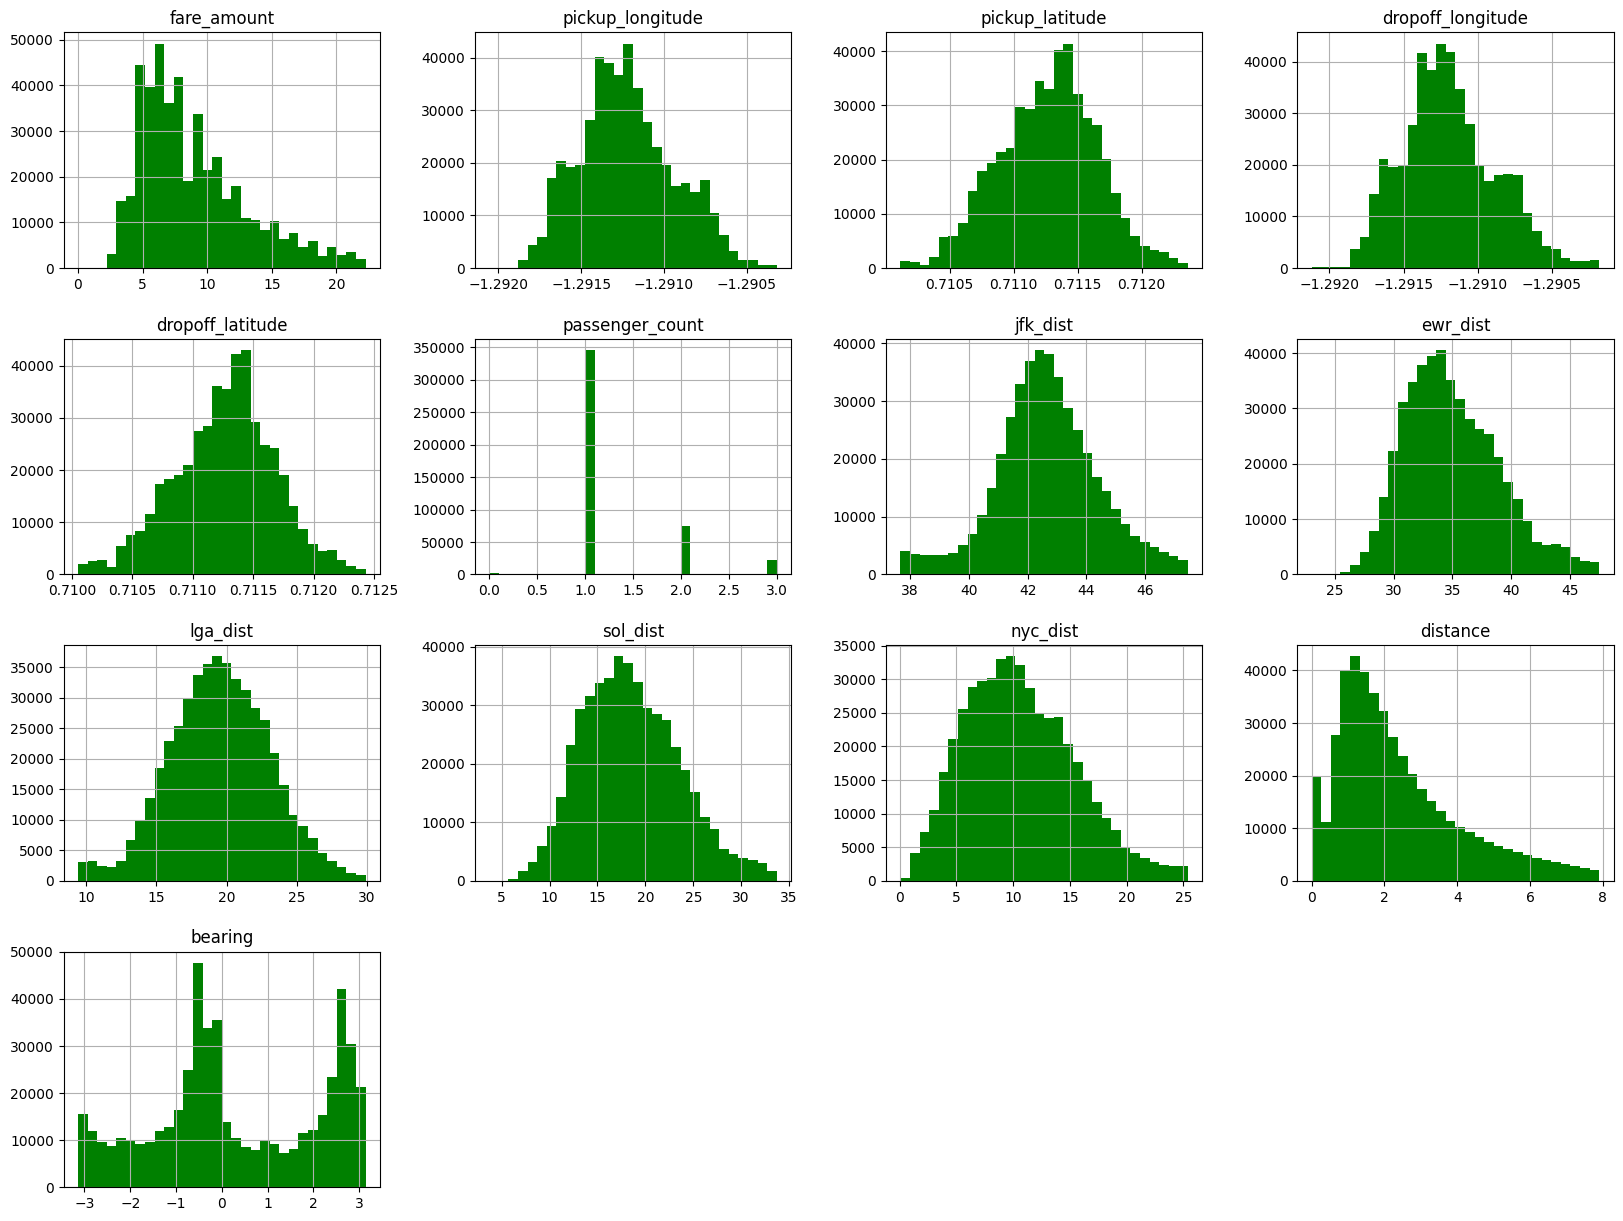

In [8]:
univariate_analysis(df)

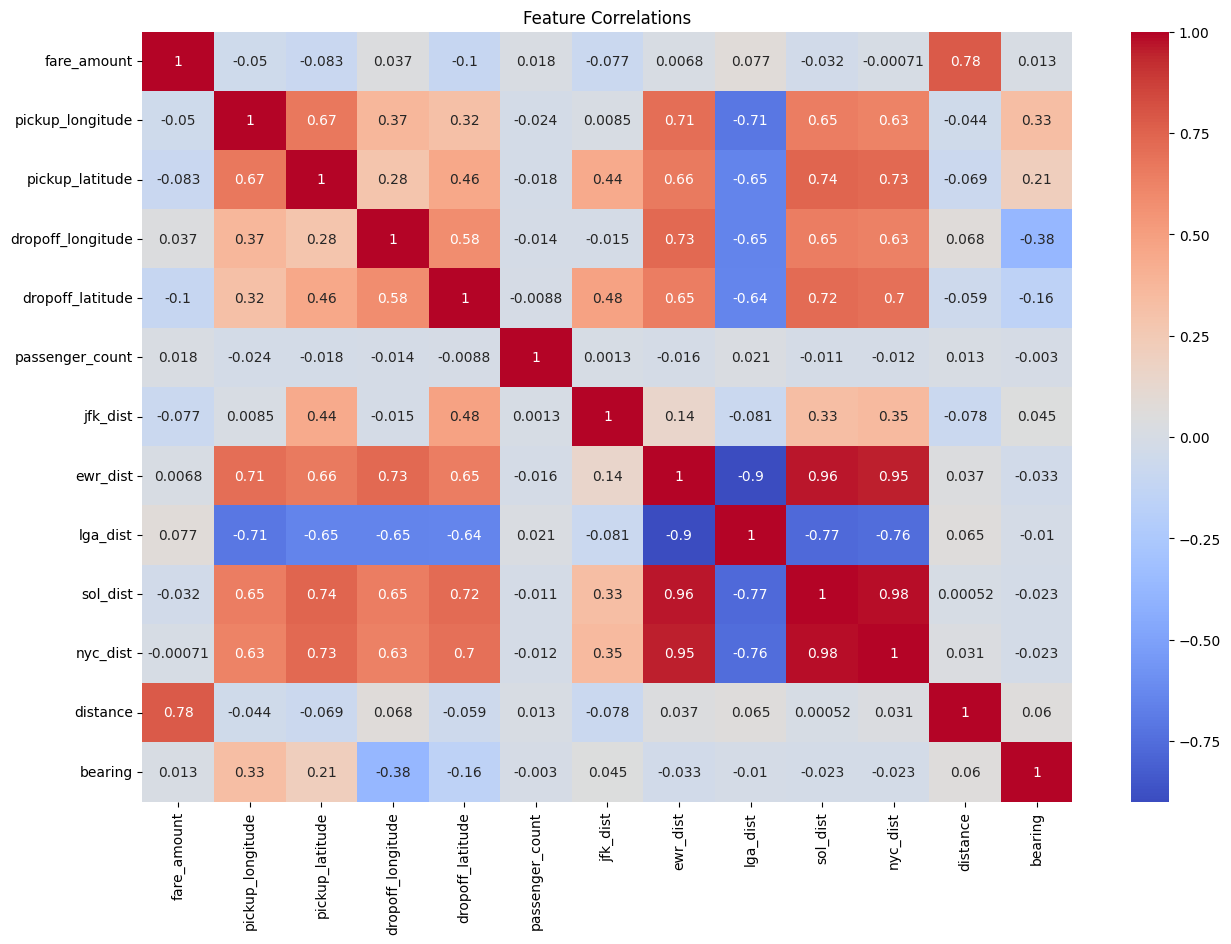

In [9]:
bivariate_analysis(df)

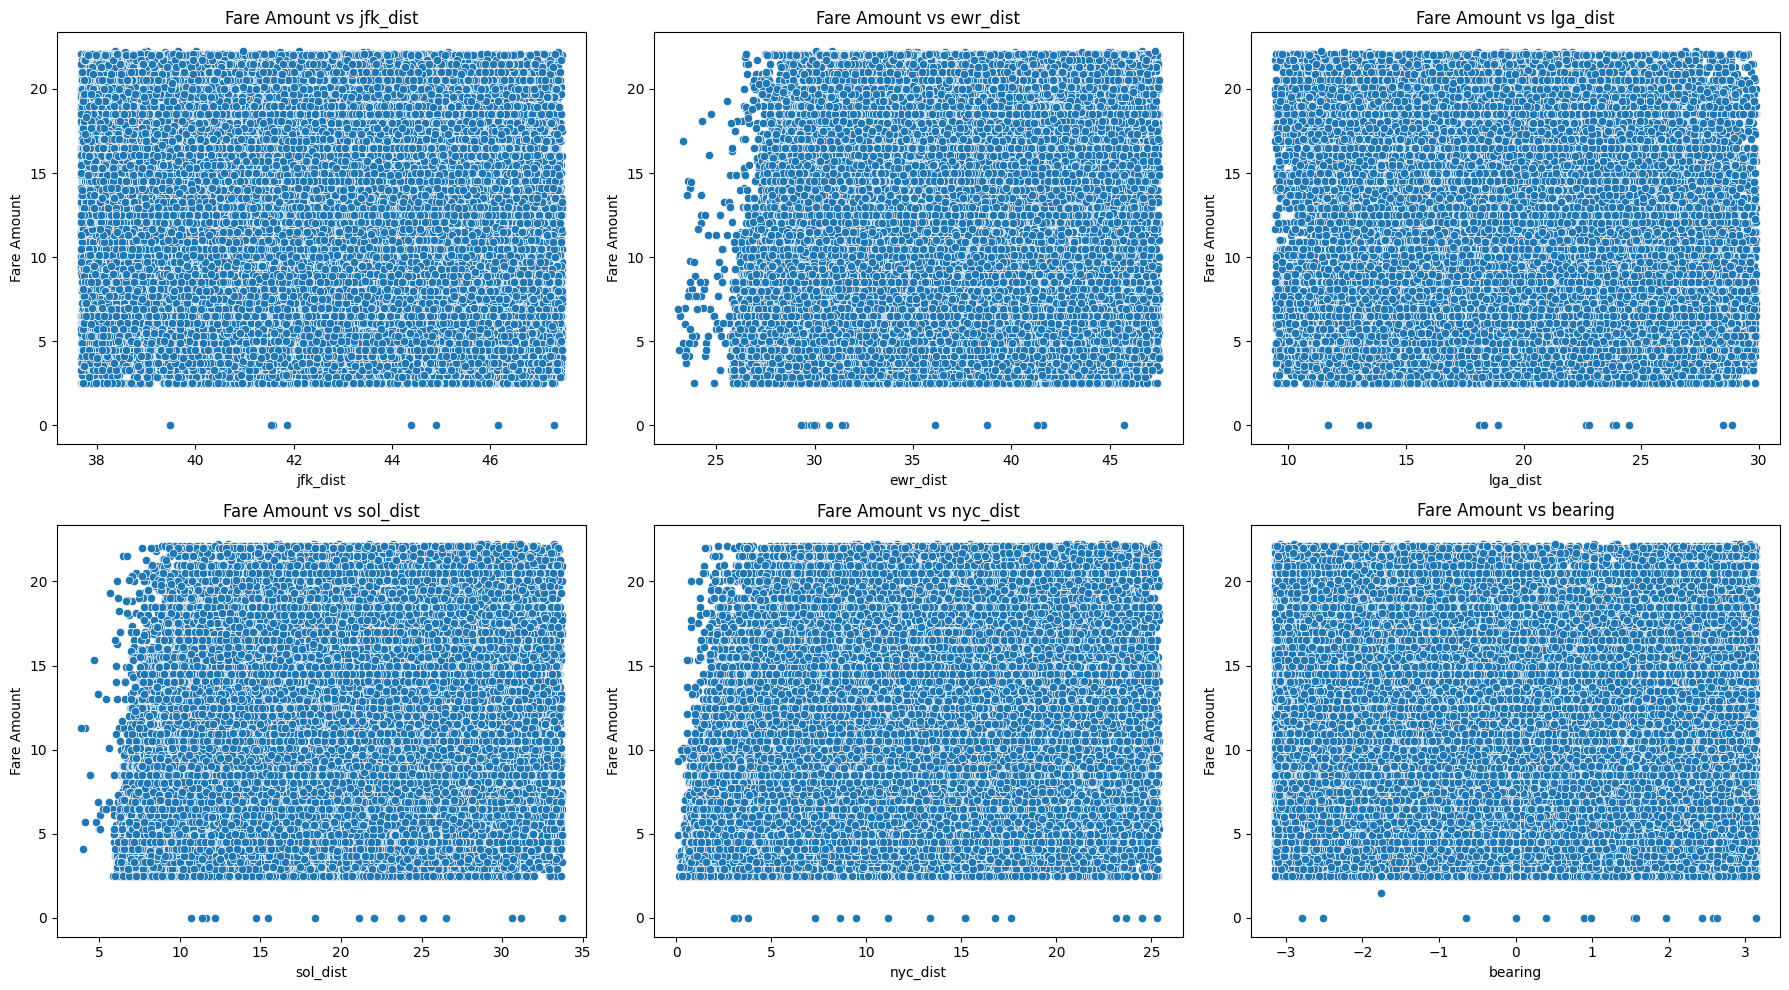

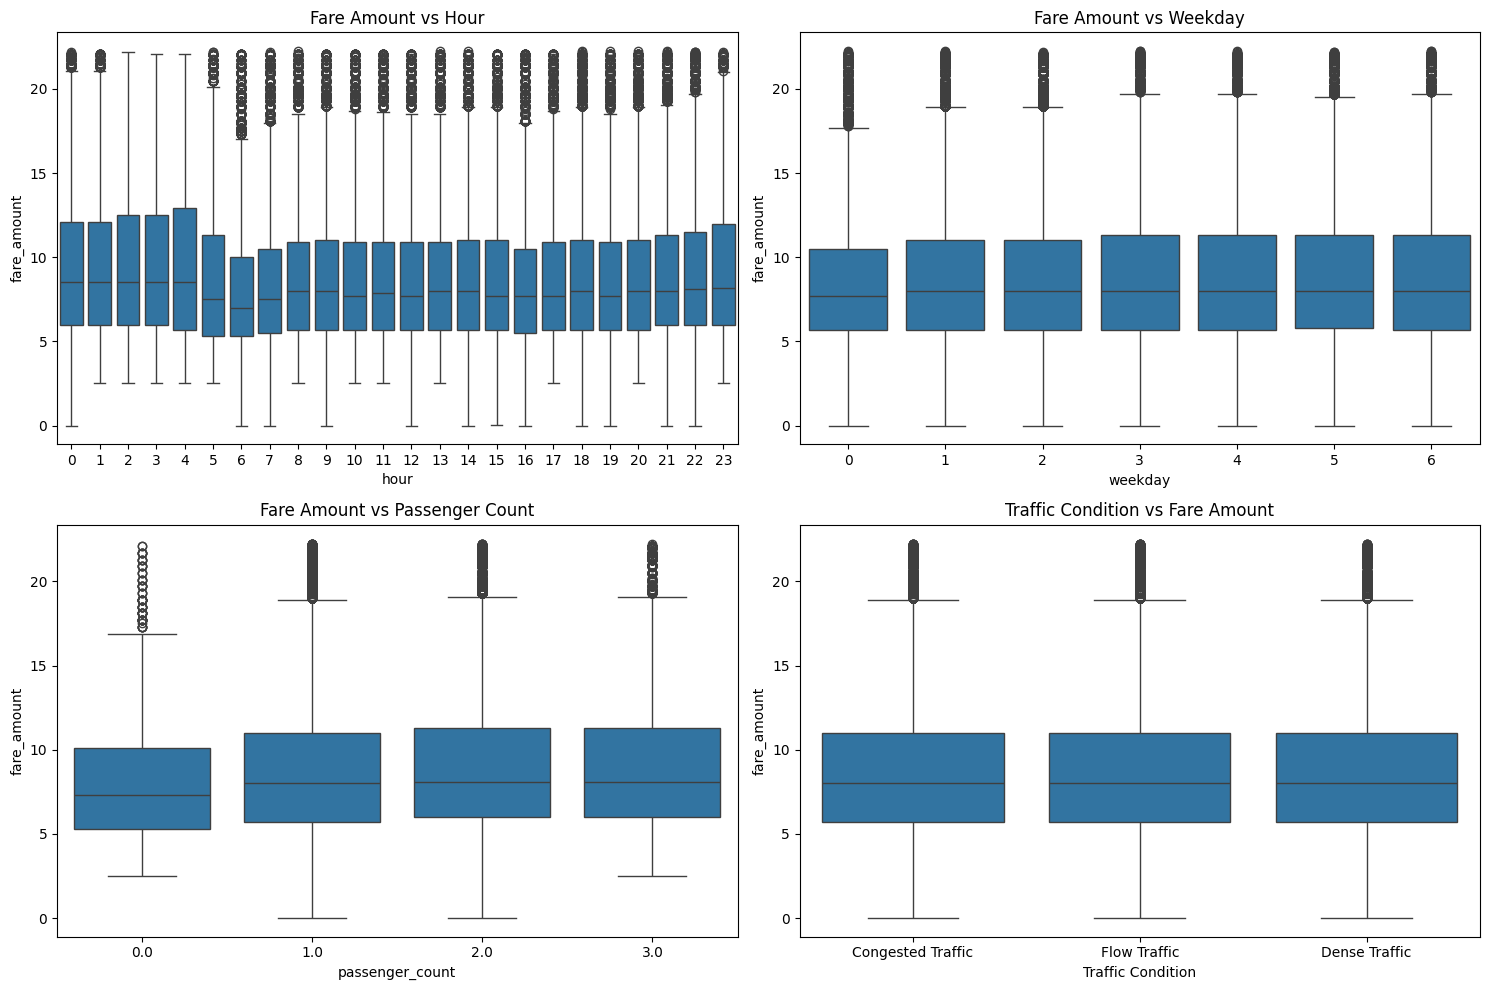

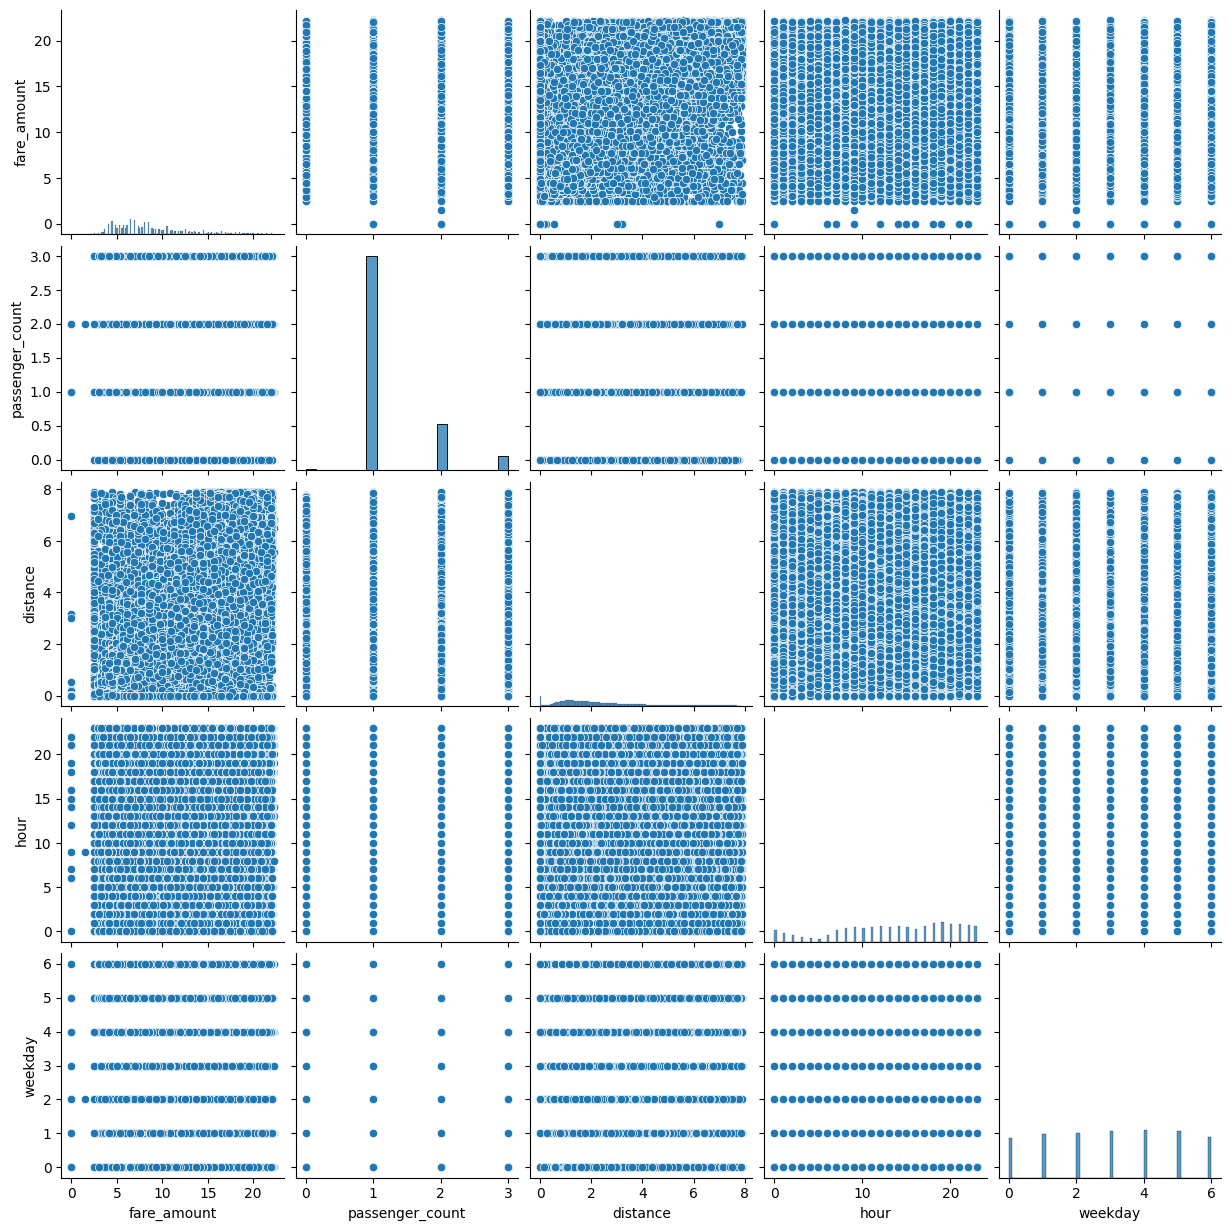

In [10]:
# Plot important features against fare amount
important_features = ['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist','bearing']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(important_features):
    sns.scatterplot(x=df[feature], y=df['fare_amount'], ax=axes[i])
    axes[i].set_title(f"Fare Amount vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Fare Amount')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(x=df['hour'], y=df['fare_amount'], ax=axes[0, 0])
axes[0, 0].set_title("Fare Amount vs Hour")
sns.boxplot(x=df['weekday'], y=df['fare_amount'], ax=axes[0, 1])
axes[0, 1].set_title("Fare Amount vs Weekday")
sns.boxplot(x=df['passenger_count'], y=df['fare_amount'], ax=axes[1, 0])
axes[1, 0].set_title("Fare Amount vs Passenger Count")
sns.boxplot(x=df['Traffic Condition'], y=df['fare_amount'], ax=axes[1, 1])
axes[1, 1].set_title("Traffic Condition vs Fare Amount")
plt.tight_layout()
plt.show()

# fig, ax = plt.subplots(figsize=(8, 5))
# ax.set_title("Fare Amount vs Hour")
# plt.tight_layout()
# plt.show()
# Pair plot for the coordinates
# coordinates = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
# sns.pairplot(df[coordinates].dropna())
sns.pairplot(df[['fare_amount', 'passenger_count', 'distance', 'hour', 'weekday', 'Traffic Condition']])
plt.show()

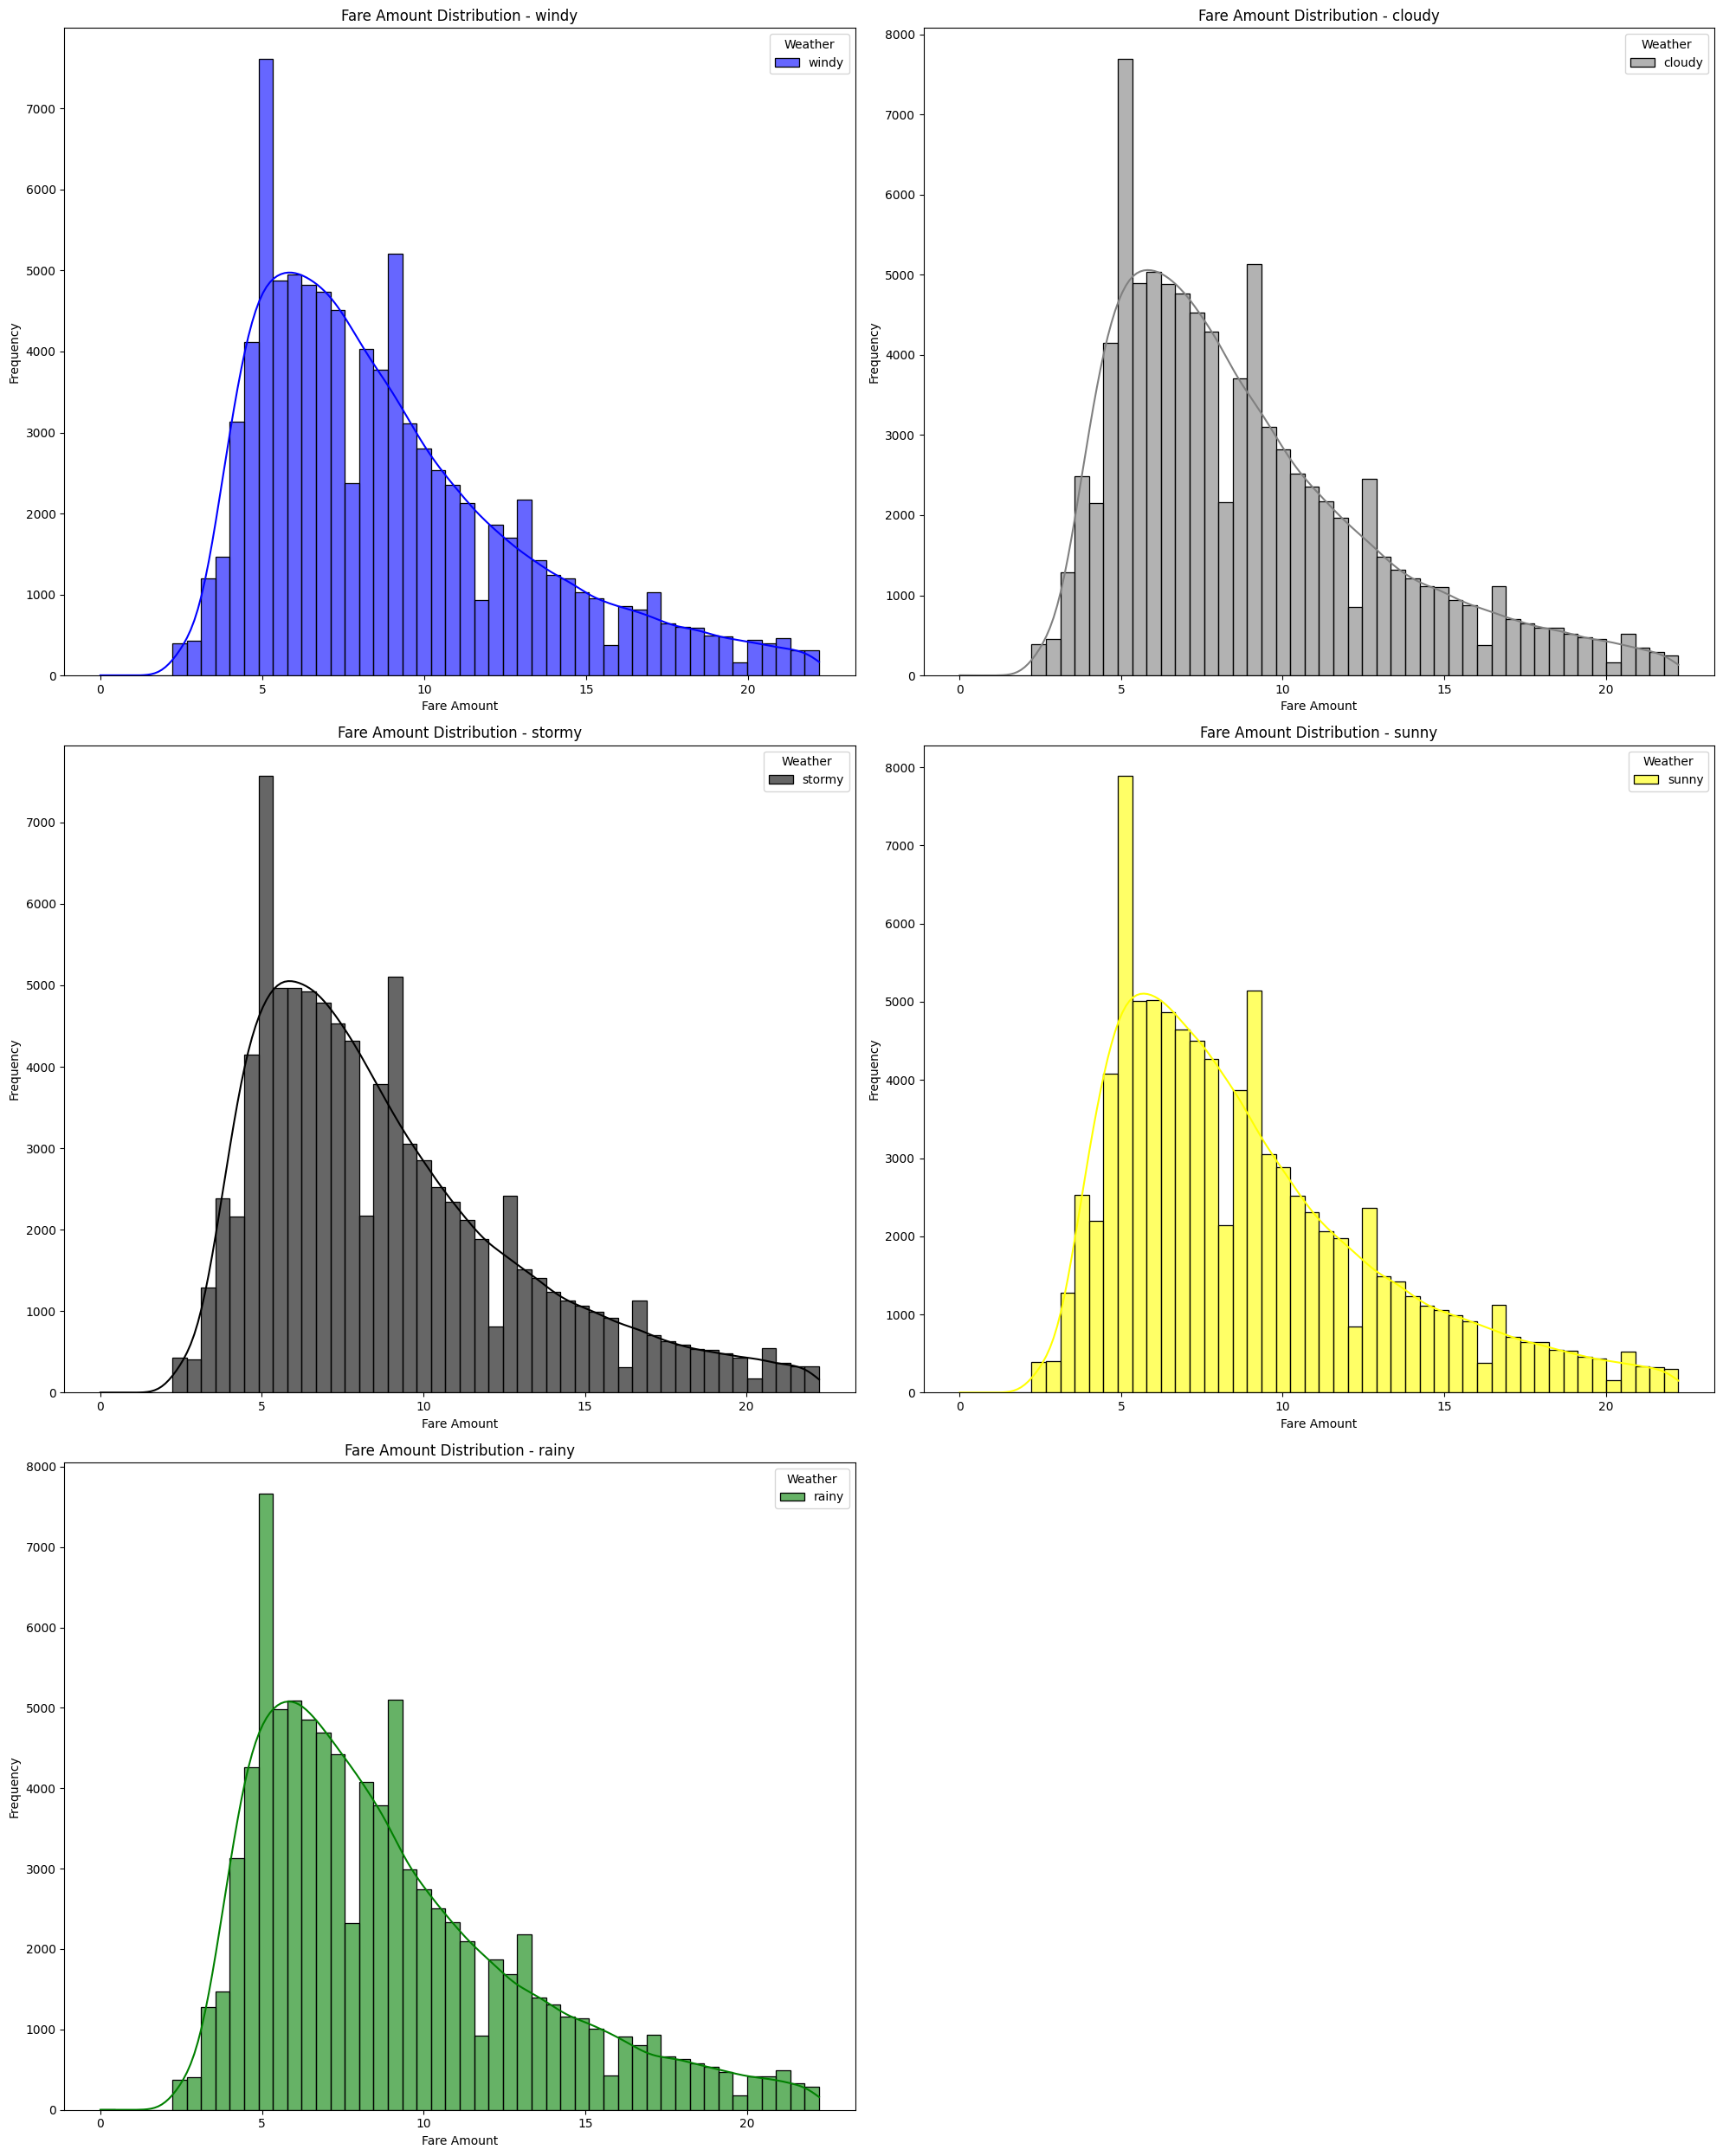

In [11]:
# Plot fare amount distribution for each weather type separately
unique_weathers = df['Weather'].unique()
weather_colors = {
    'windy': 'blue',
    'cloudy': 'gray',
    'stormy': 'black',
    'sunny': 'yellow',
    'rainy': 'green'
}

plt.figure(figsize=(20, 25))
for i, weather in enumerate(unique_weathers, 1):
    subset = df[df['Weather'] == weather]
    plt.subplot(3, 2, i)
    sns.histplot(subset['fare_amount'].dropna(), bins=50, kde=True, label=weather, color=weather_colors[weather], alpha=0.6)
    plt.title(f'Fare Amount Distribution - {weather}')
    plt.xlabel('Fare Amount')
    plt.ylabel('Frequency')
    plt.legend(title='Weather')

plt.tight_layout()
plt.show()


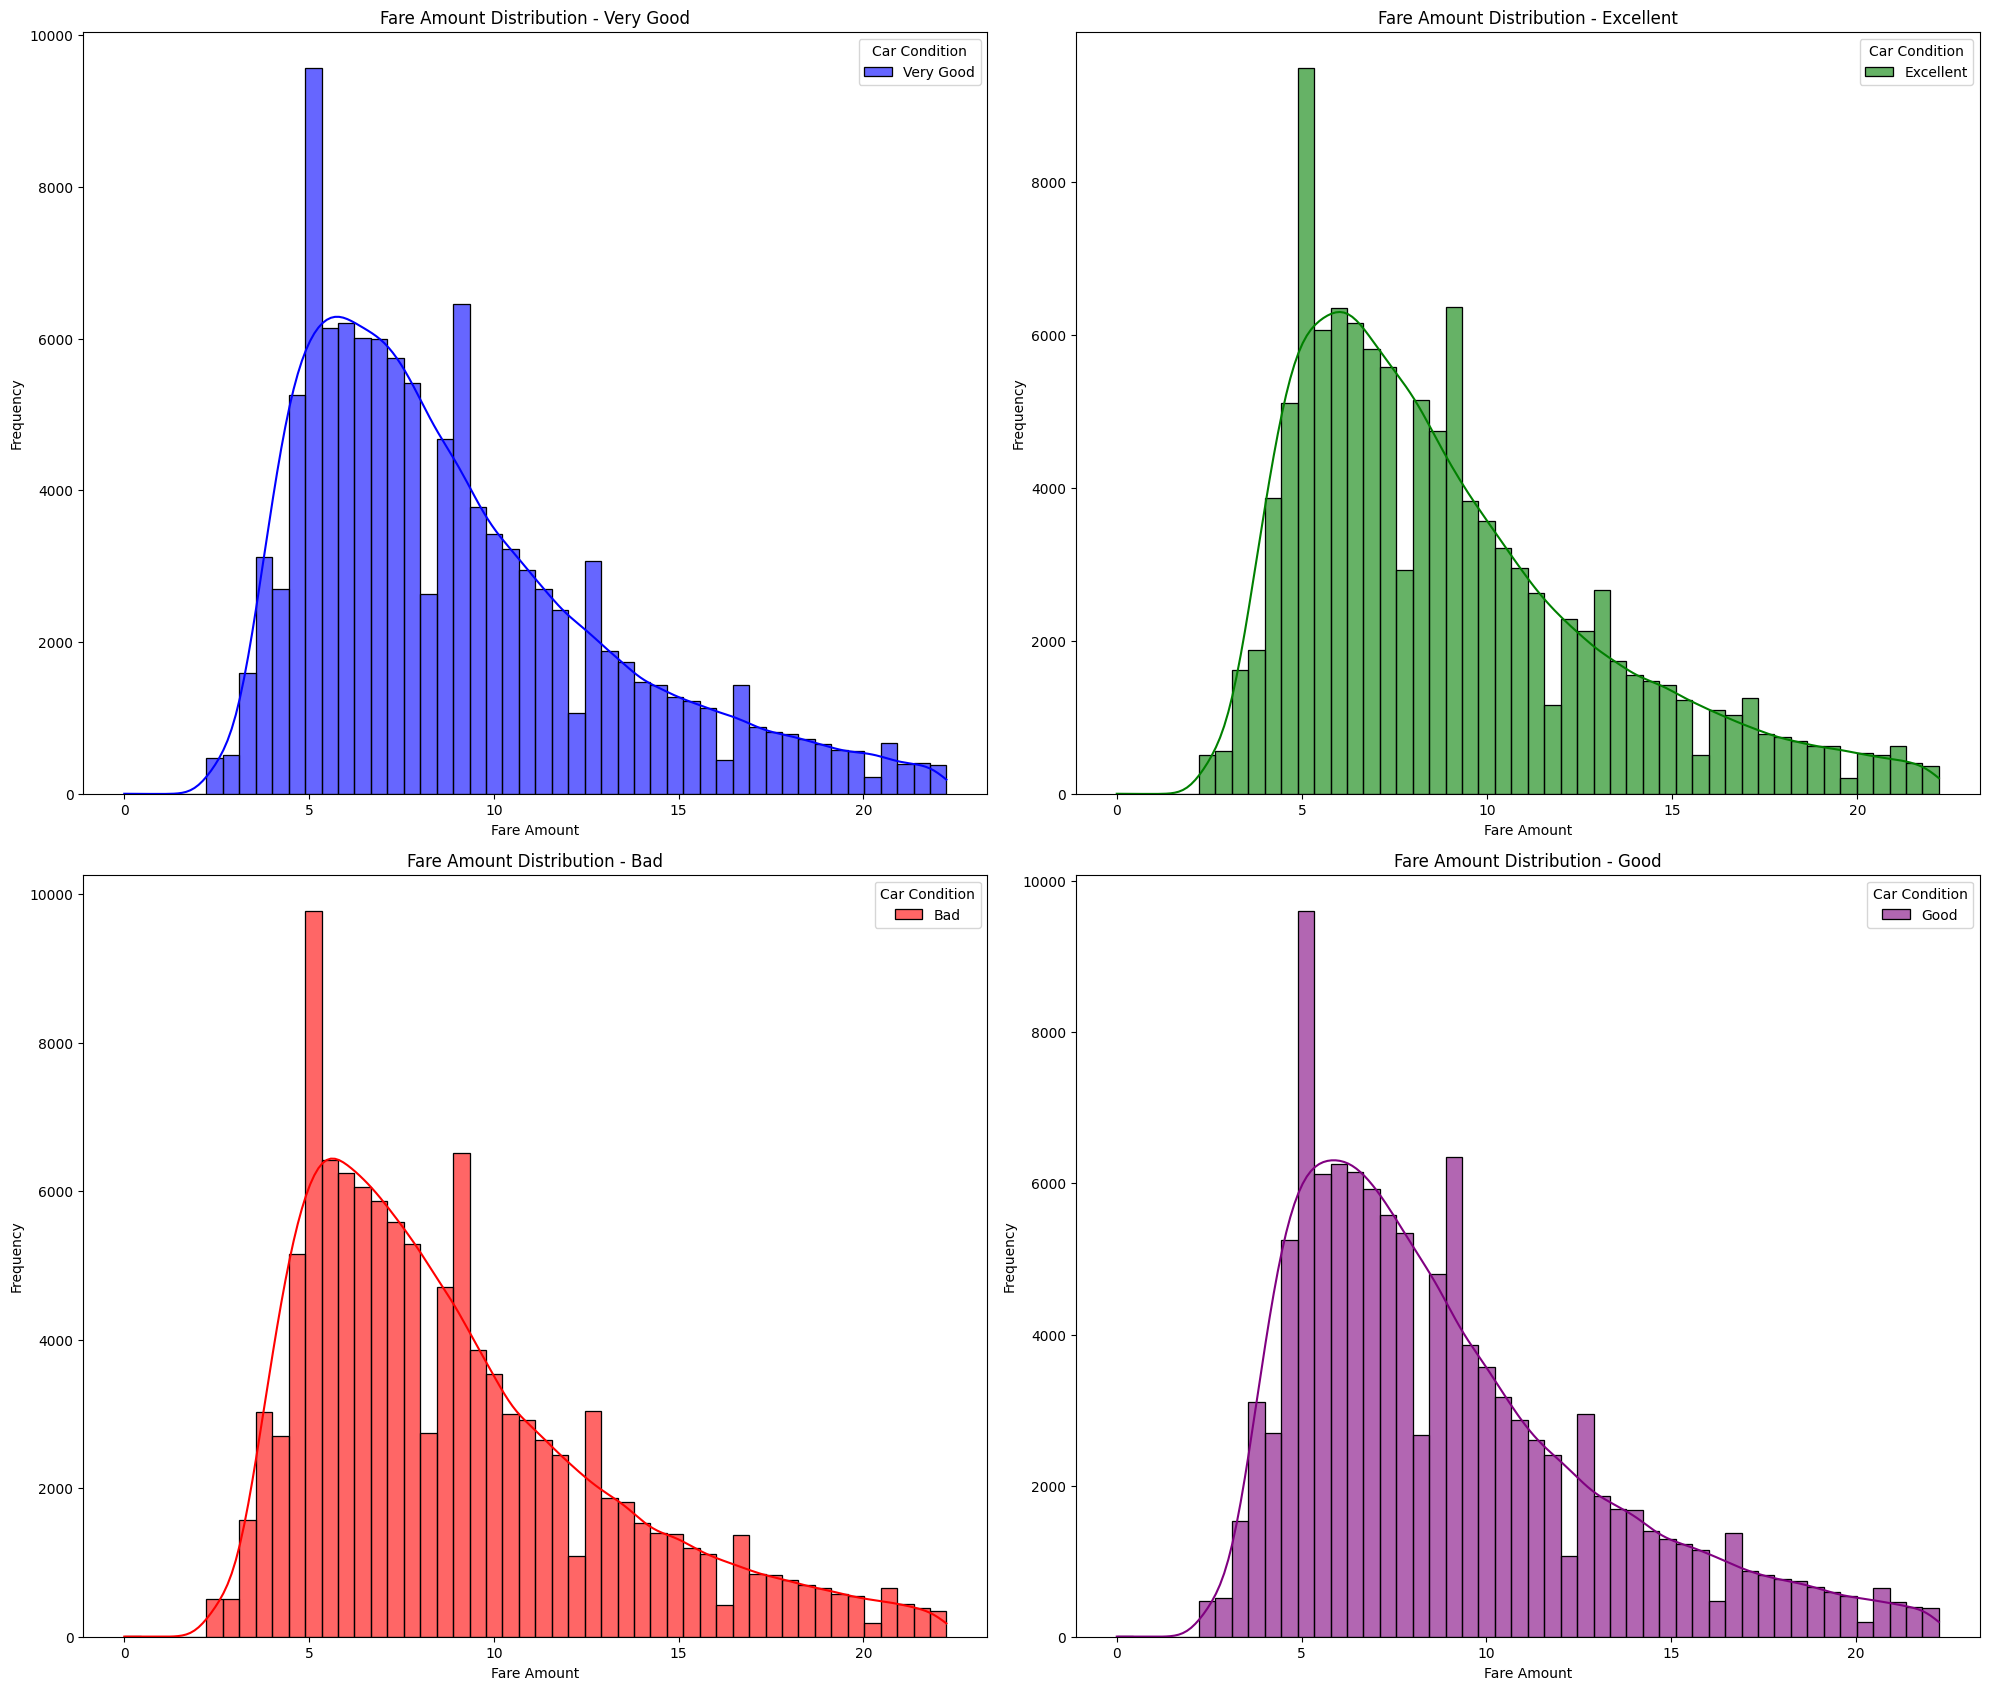

In [12]:
# Plot fare amount distribution for each car condition separately
unique_conditions = df['Car Condition'].unique()
colors = {
    'Very Good': 'blue',
    'Excellent': 'green',
    'Bad': 'red',
    'Good': 'purple'
}

plt.figure(figsize=(20, 25))
for i, condition in enumerate(unique_conditions, 1):
    subset = df[df['Car Condition'] == condition]
    plt.subplot(3, 2, i)
    sns.histplot(subset['fare_amount'].dropna(), bins=50, kde=True, label=condition, color=colors[condition], alpha=0.6)
    plt.title(f'Fare Amount Distribution - {condition}')
    plt.xlabel('Fare Amount')
    plt.ylabel('Frequency')
    plt.legend(title='Car Condition')

plt.tight_layout()
plt.show()

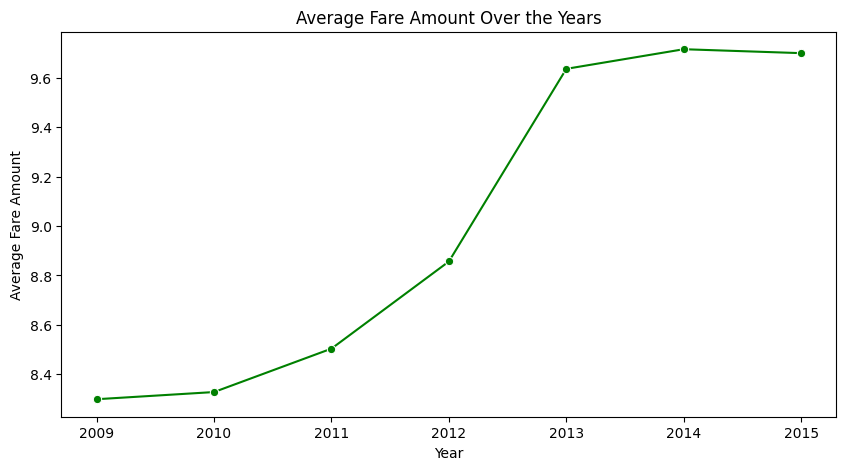

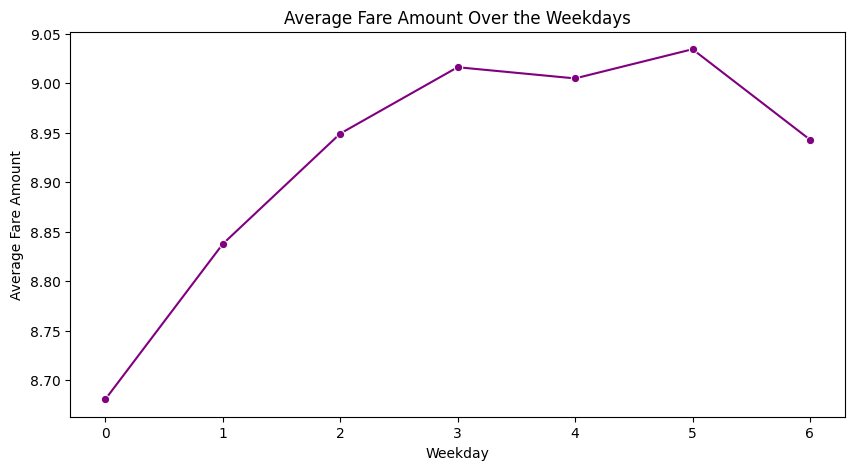

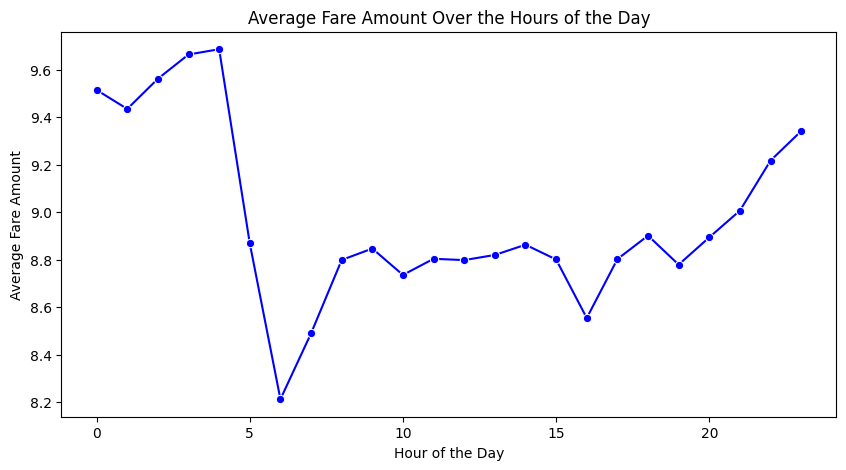

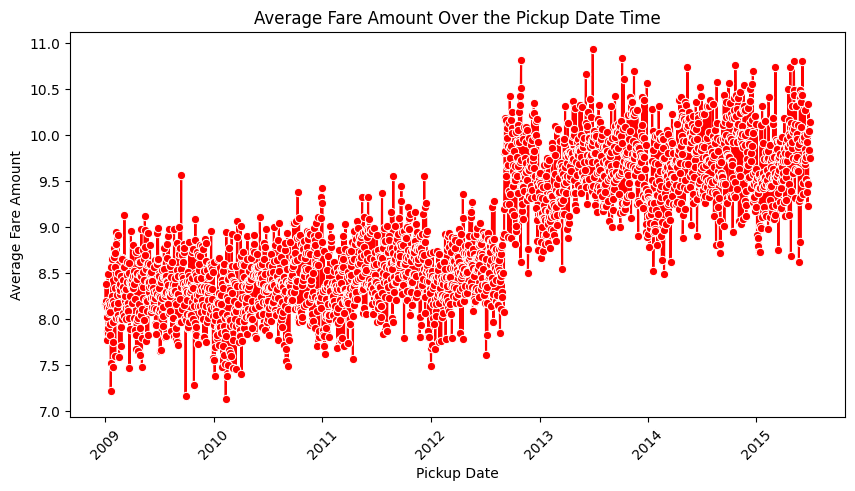

In [13]:
# Average fare amount over the years
avg_fare_year = df.groupby('year')['fare_amount'].mean()

# Plotting the average fare amount over the years
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_year.index, y=avg_fare_year.values, marker='o', color='green')
plt.title('Average Fare Amount Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Fare Amount')
plt.show()

# Average fare amount over the weekdays
avg_fare_weekday = df.groupby('weekday')['fare_amount'].mean()

# Plotting the average fare amount over the weekdays
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_weekday.index, y=avg_fare_weekday.values, marker='o', color='purple')
plt.title('Average Fare Amount Over the Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Average Fare Amount')
plt.show()

# Average fare amount over the hours of the day
avg_fare_hour = df.groupby('hour')['fare_amount'].mean()

# Plotting the average fare amount over the hours of the day
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_hour.index, y=avg_fare_hour.values, marker='o', color='blue')
plt.title('Average Fare Amount Over the Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Amount')
plt.show()

# Average fare amount over the pickup date time
df['pickup_date'] = df['pickup_datetime'].dt.date
avg_fare_date = df.groupby('pickup_date')['fare_amount'].mean()

# Plotting the average fare amount over the pickup date time
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_fare_date.index, y=avg_fare_date.values, marker='o', color='red')
plt.title('Average Fare Amount Over the Pickup Date Time')
plt.xlabel('Pickup Date')
plt.ylabel('Average Fare Amount')
plt.xticks(rotation=45)
plt.show()


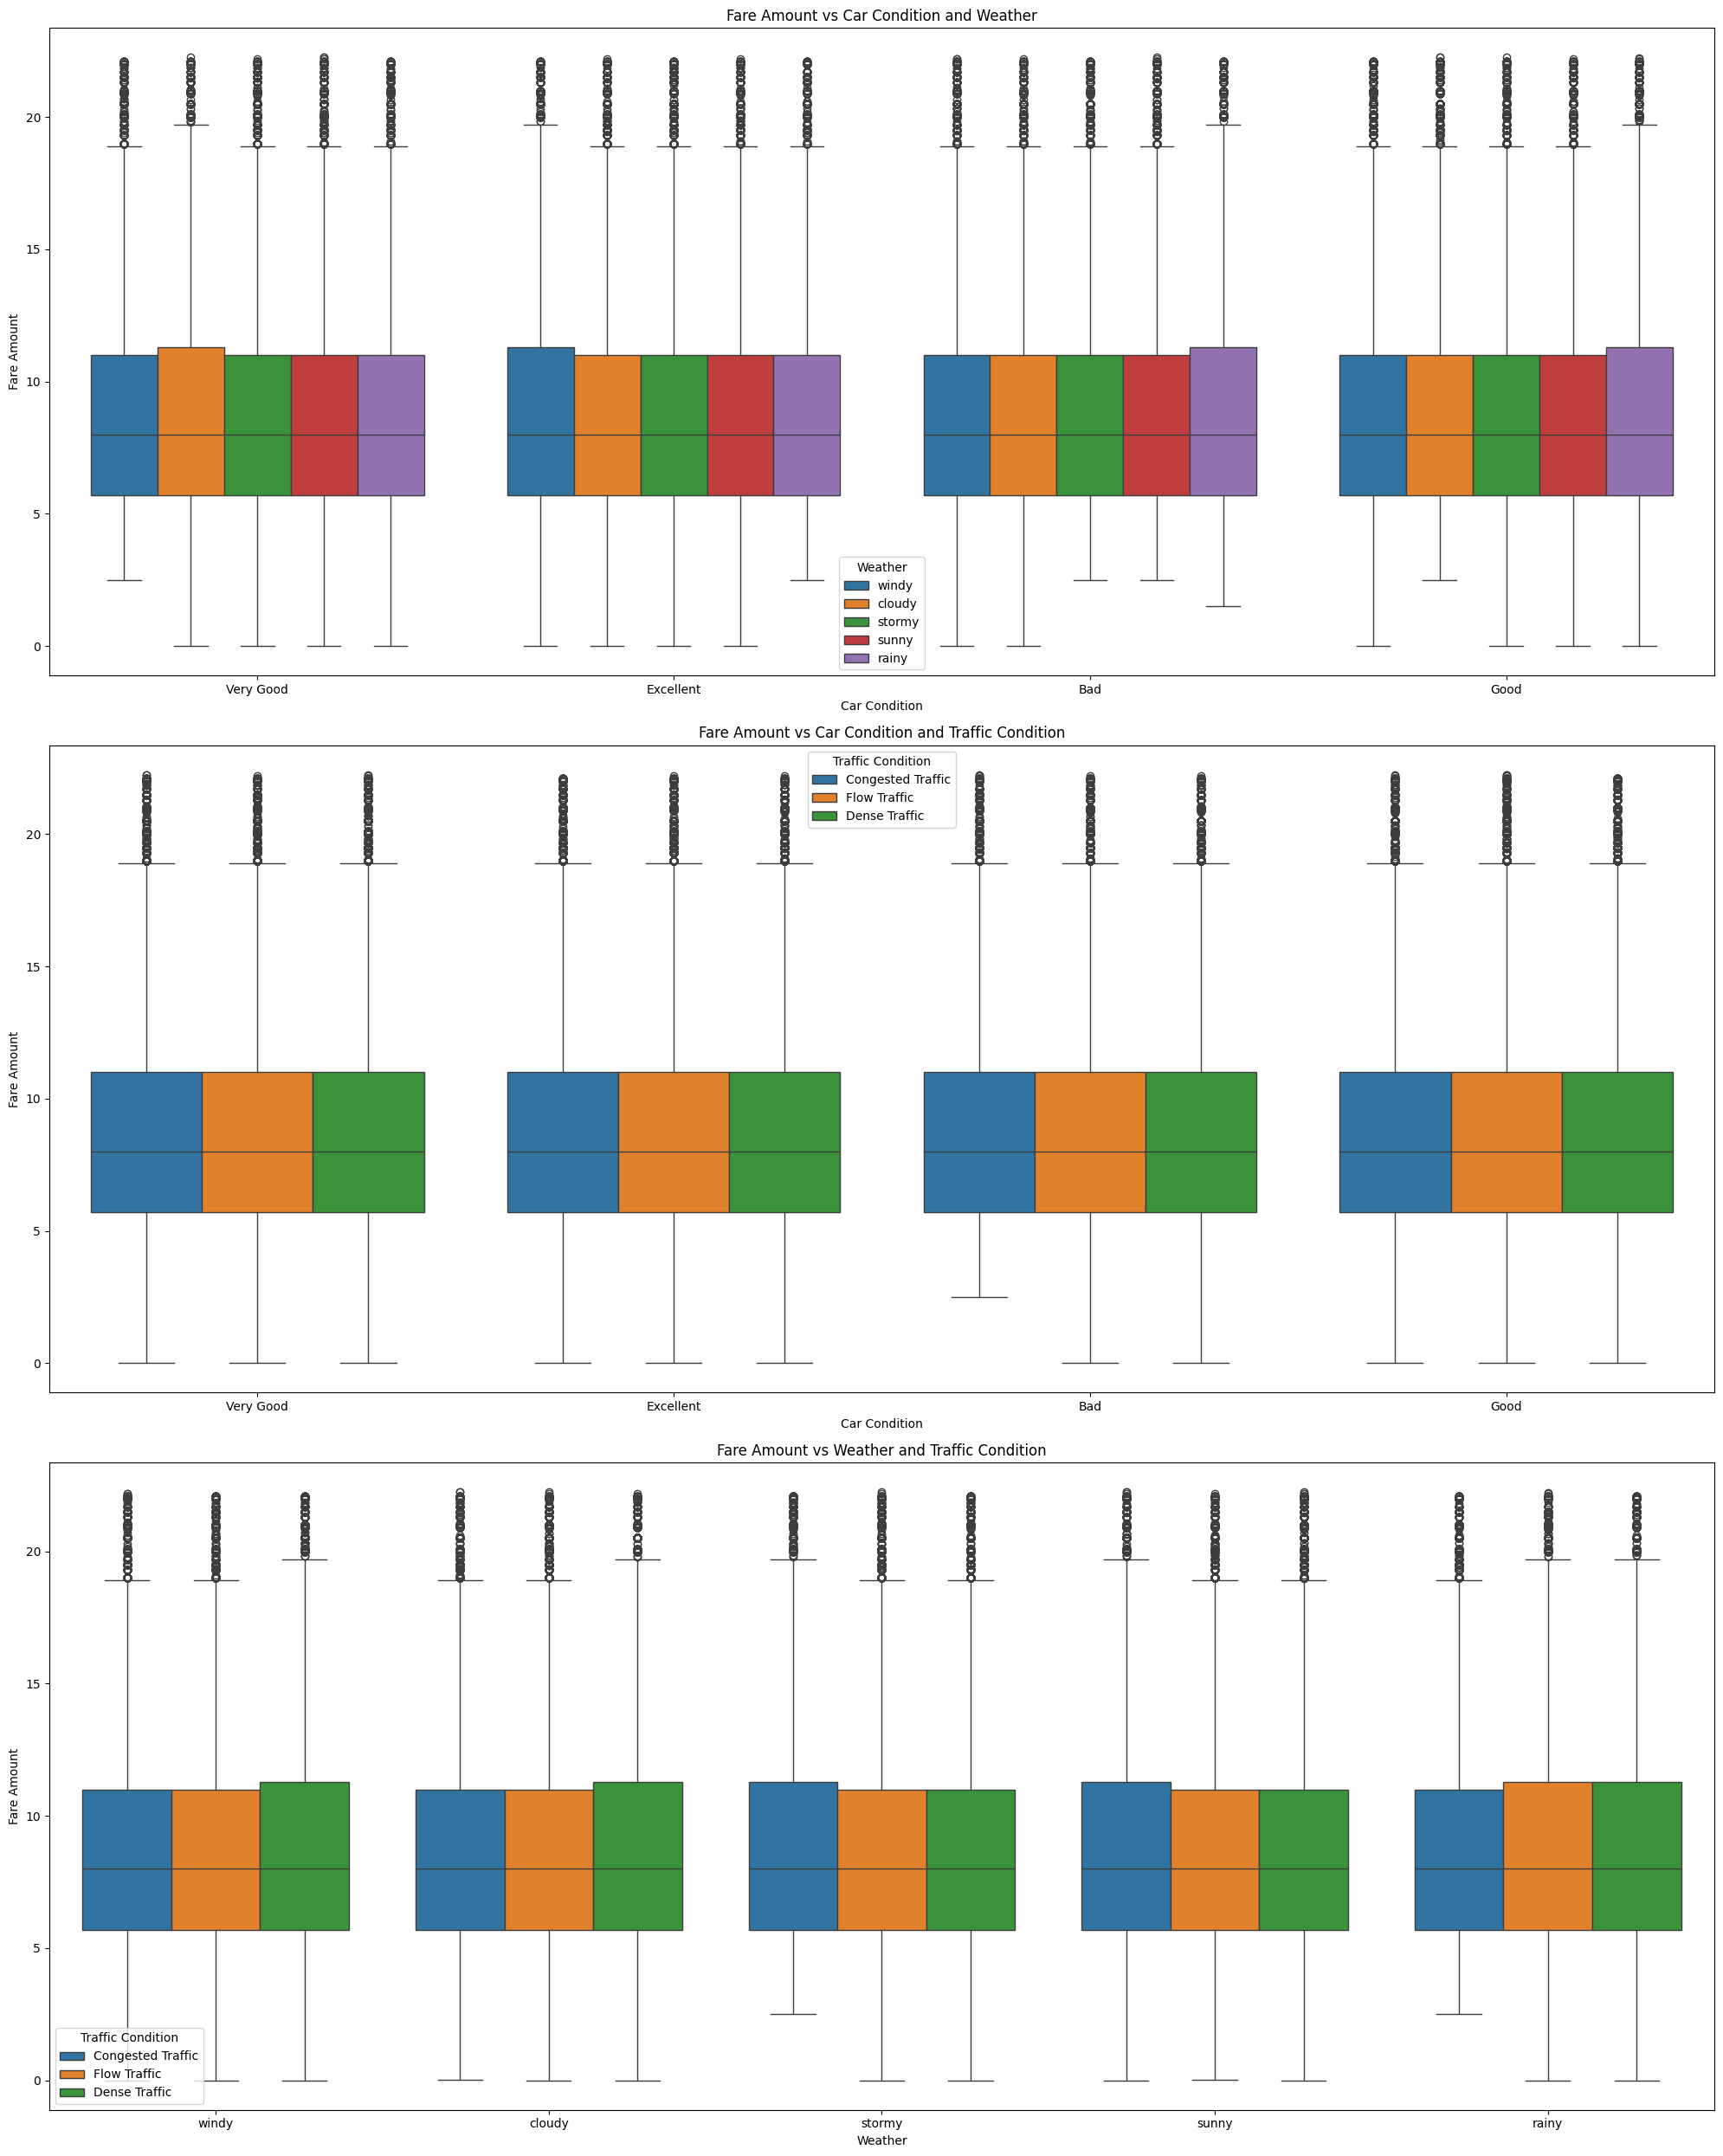

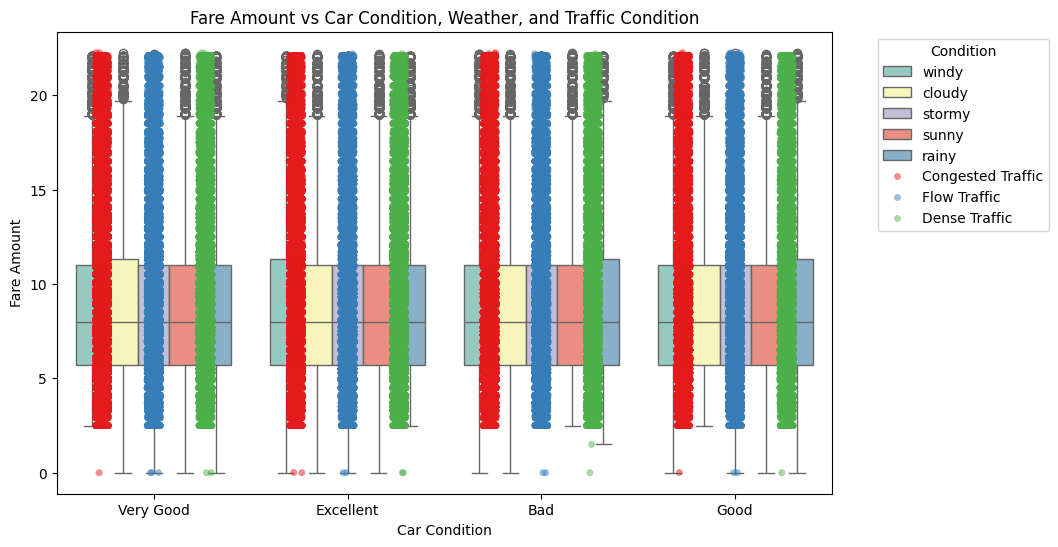

In [14]:
# Plot the effect of each pair of Car Condition, Weather, and Traffic Condition against fare amount
plt.figure(figsize=(20, 25))

# Car Condition vs Weather
plt.subplot(3, 1, 1)
sns.boxplot(x='Car Condition', y='fare_amount', hue='Weather', data=df)
plt.title('Fare Amount vs Car Condition and Weather')
plt.xlabel('Car Condition')
plt.ylabel('Fare Amount')

# Car Condition vs Traffic Condition
plt.subplot(3, 1, 2)
sns.boxplot(x='Car Condition', y='fare_amount', hue='Traffic Condition', data=df)
plt.title('Fare Amount vs Car Condition and Traffic Condition')
plt.xlabel('Car Condition')
plt.ylabel('Fare Amount')

# Weather vs Traffic Condition
plt.subplot(3, 1, 3)
sns.boxplot(x='Weather', y='fare_amount', hue='Traffic Condition', data=df)
plt.title('Fare Amount vs Weather and Traffic Condition')
plt.xlabel('Weather')
plt.ylabel('Fare Amount')

plt.tight_layout()
plt.show()

# Plot the effect of Car Condition, Weather, and Traffic Condition against fare amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Car Condition', y='fare_amount', hue='Weather', data=df, palette='Set3')
sns.stripplot(x='Car Condition', y='fare_amount', hue='Traffic Condition', data=df, dodge=True, marker='o', alpha=0.5, palette='Set1')
plt.title('Fare Amount vs Car Condition, Weather, and Traffic Condition')
plt.xlabel('Car Condition')
plt.ylabel('Fare Amount')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

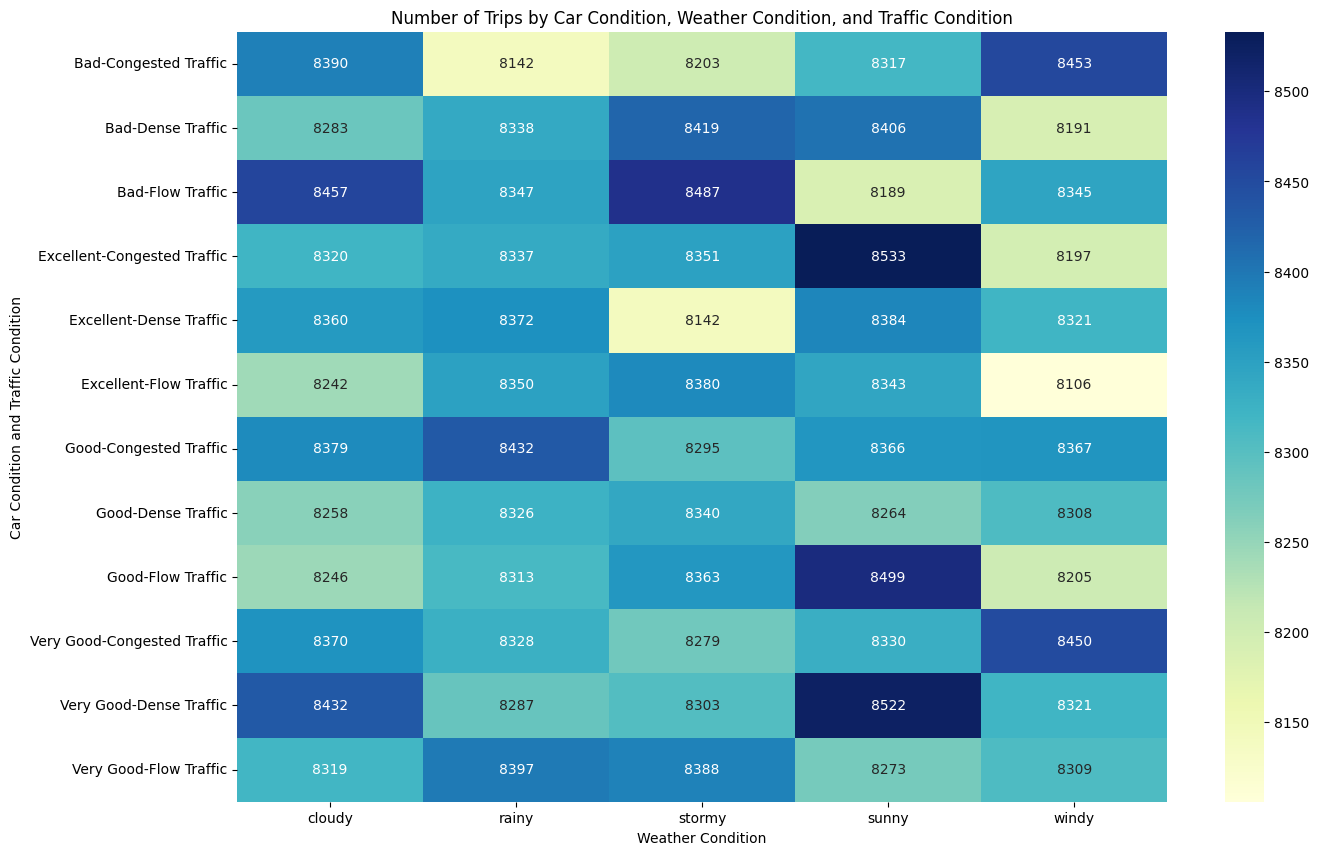

In [16]:
# # Create a pivot table to count the number of trips for each combination of car condition and weather condition
# pivot_table = df.pivot_table(index='Car Condition', columns='Weather', aggfunc='size', fill_value=0)

# # Plot the heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
# plt.title('Number of Trips by Car Condition and Weather Condition')
# plt.xlabel('Weather Condition')
# plt.ylabel('Car Condition')
# plt.show()

# Create a pivot table to count the number of trips for each combination of car condition, weather condition, and traffic condition
pivot_table_traffic = df.pivot_table(index=['Car Condition', 'Traffic Condition'], columns='Weather', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_traffic, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Trips by Car Condition, Weather Condition, and Traffic Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Car Condition and Traffic Condition')
plt.show()

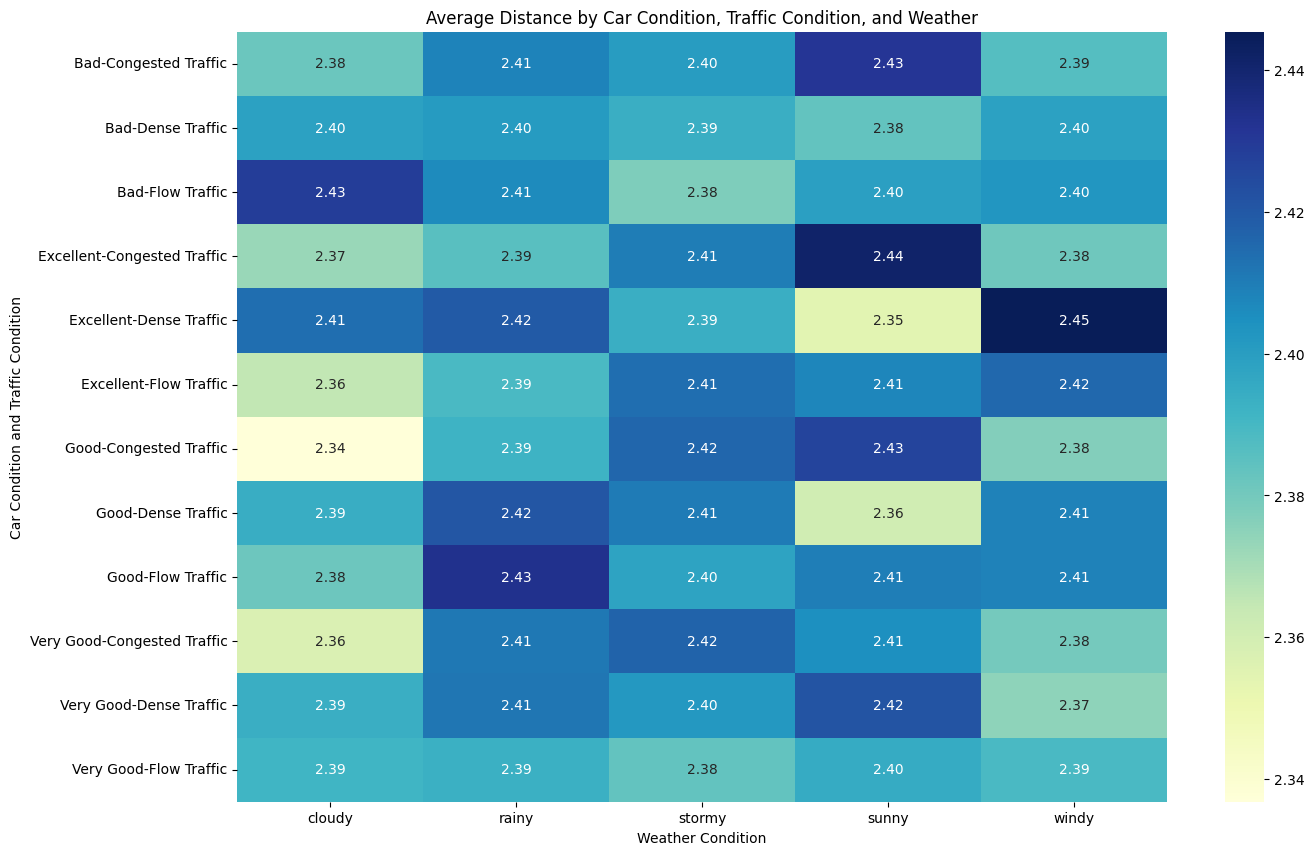

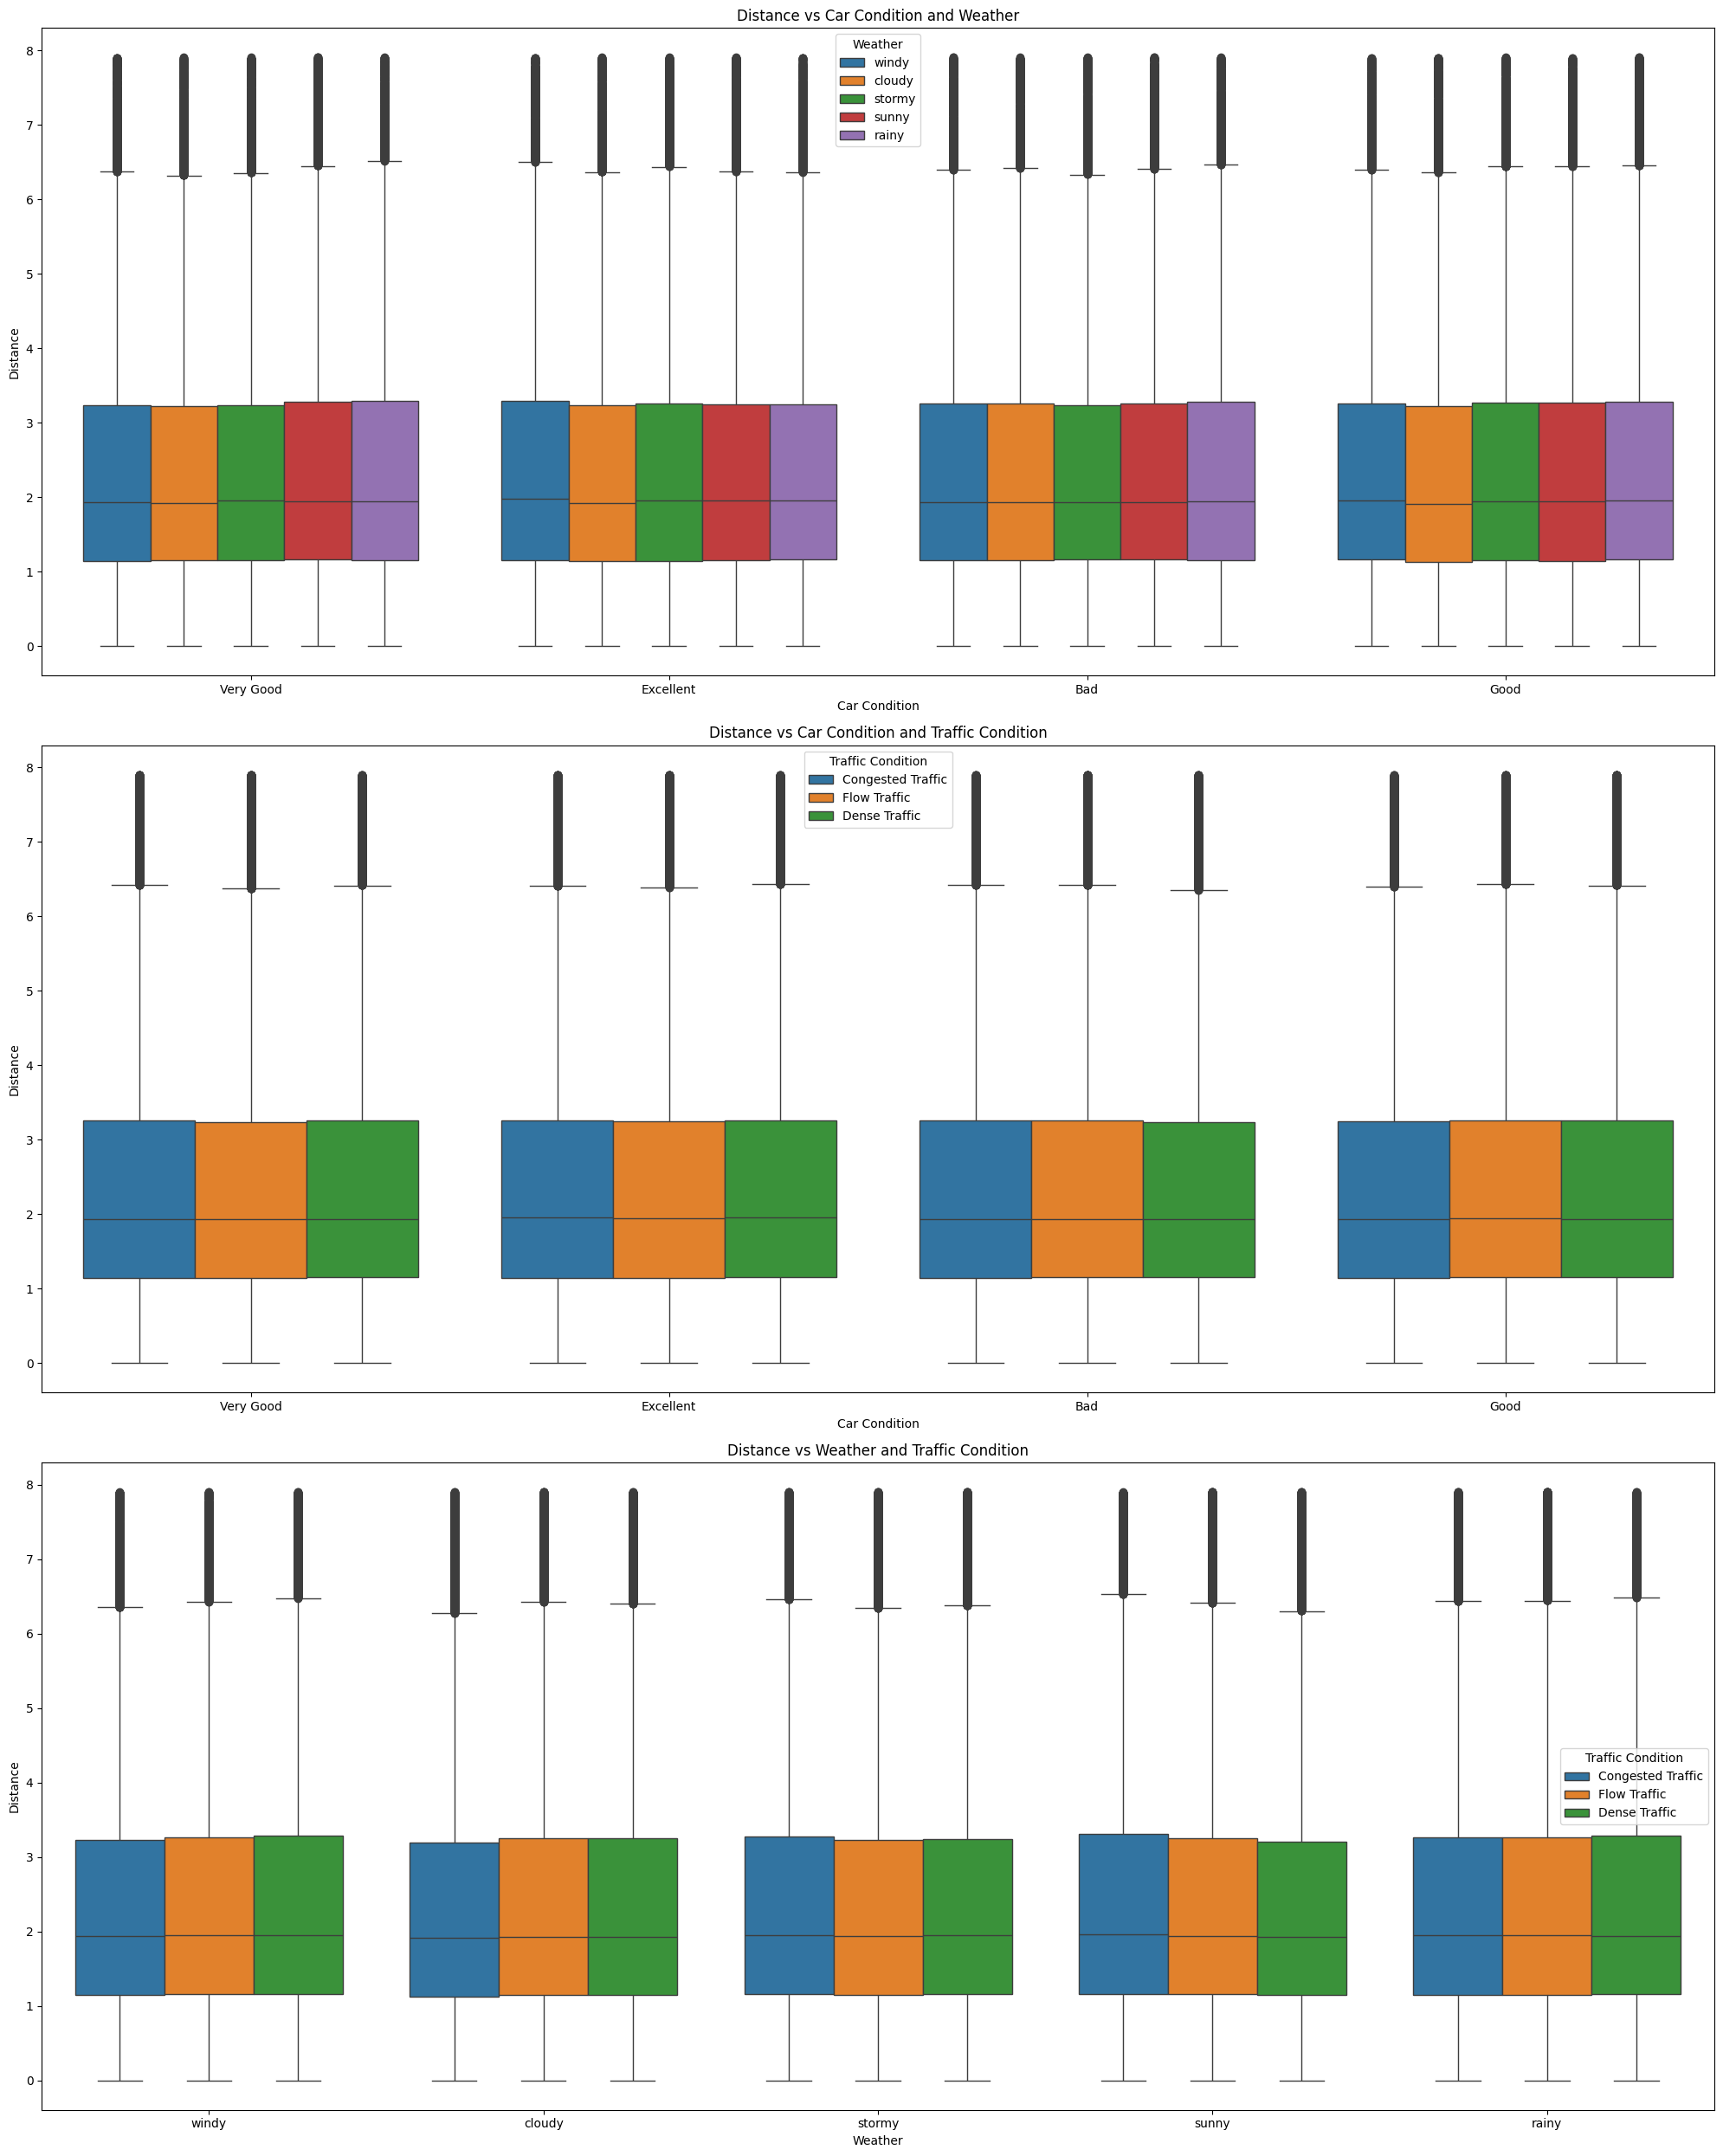

In [20]:
# Create a pivot table to calculate the average distance for each combination of Traffic Condition, Car Condition, and Weather
pivot_table_avg_distance = df.pivot_table(values='distance', index=['Car Condition', 'Traffic Condition'], columns='Weather', aggfunc='mean', fill_value=0)

# Plot the heatmap for average distance
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table_avg_distance, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Average Distance by Car Condition, Traffic Condition, and Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Car Condition and Traffic Condition')
plt.show()

# Plot the effect of each pair of Car Condition, Weather, and Traffic Condition against distance
plt.figure(figsize=(20, 25))

# Car Condition vs Weather
plt.subplot(3, 1, 1)
sns.boxplot(x='Car Condition', y='distance', hue='Weather', data=df)
plt.title('Distance vs Car Condition and Weather')
plt.xlabel('Car Condition')
plt.ylabel('Distance')

# Car Condition vs Traffic Condition
plt.subplot(3, 1, 2)
sns.boxplot(x='Car Condition', y='distance', hue='Traffic Condition', data=df)
plt.title('Distance vs Car Condition and Traffic Condition')
plt.xlabel('Car Condition')
plt.ylabel('Distance')

# Weather vs Traffic Condition
plt.subplot(3, 1, 3)
sns.boxplot(x='Weather', y='distance', hue='Traffic Condition', data=df)
plt.title('Distance vs Weather and Traffic Condition')
plt.xlabel('Weather')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

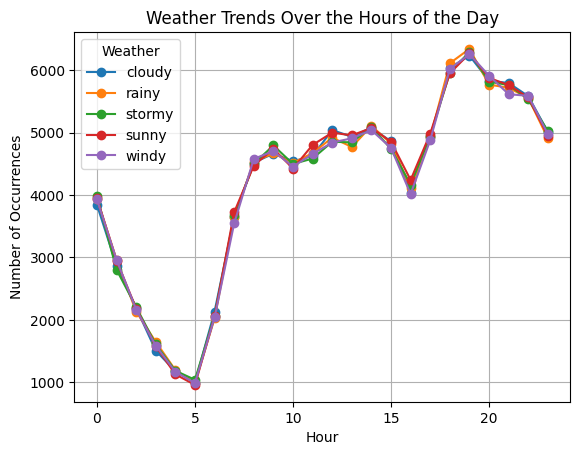

<Figure size 1200x800 with 0 Axes>

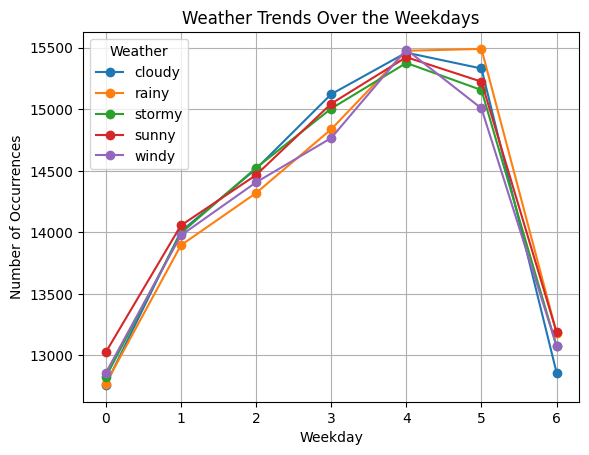

In [24]:
# Create a pivot table to count the occurrences of each weather type over the hours of the day
weather_trends_hour = df.pivot_table(index='hour', columns='Weather', aggfunc='size', fill_value=0)

# Plot the weather trends over the hours of the day
plt.figure(figsize=(12, 8))
weather_trends_hour.plot(kind='line', marker='o')
plt.title('Weather Trends Over the Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Occurrences')
plt.legend(title='Weather')
plt.grid(True)
plt.show()

# Create a pivot table to count the occurrences of each weather type over the weekdays
weather_trends_weekday = df.pivot_table(index='weekday', columns='Weather', aggfunc='size', fill_value=0)

# Plot the weather trends over the weekdays
plt.figure(figsize=(12, 8))
weather_trends_weekday.plot(kind='line', marker='o')
plt.title('Weather Trends Over the Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Number of Occurrences')
plt.legend(title='Weather')
plt.grid(True)
plt.show()

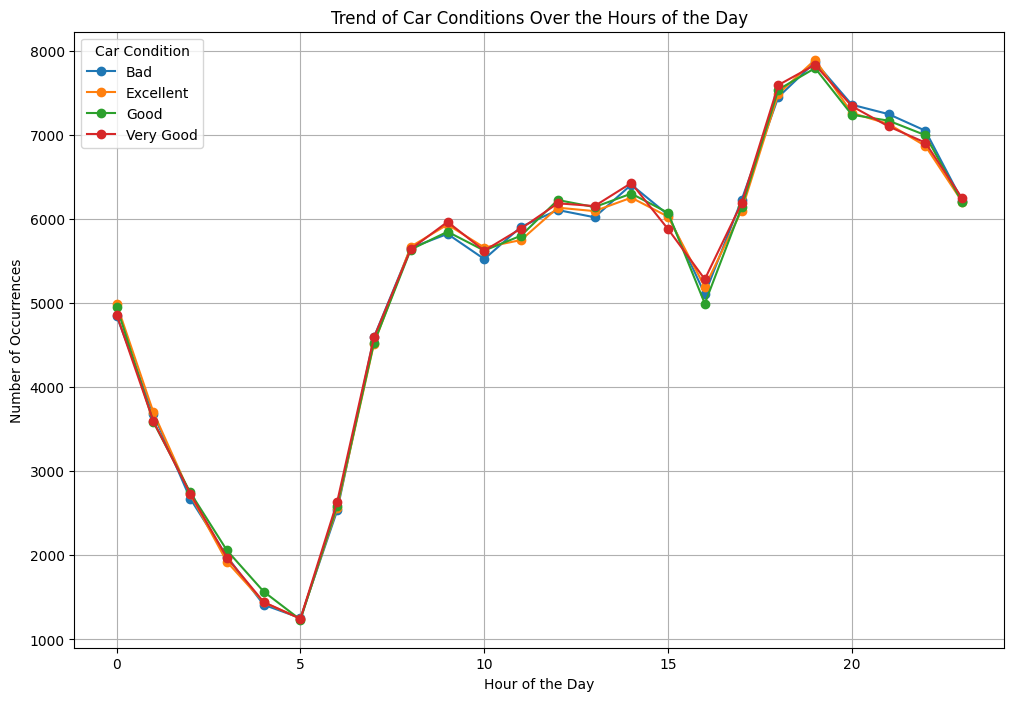

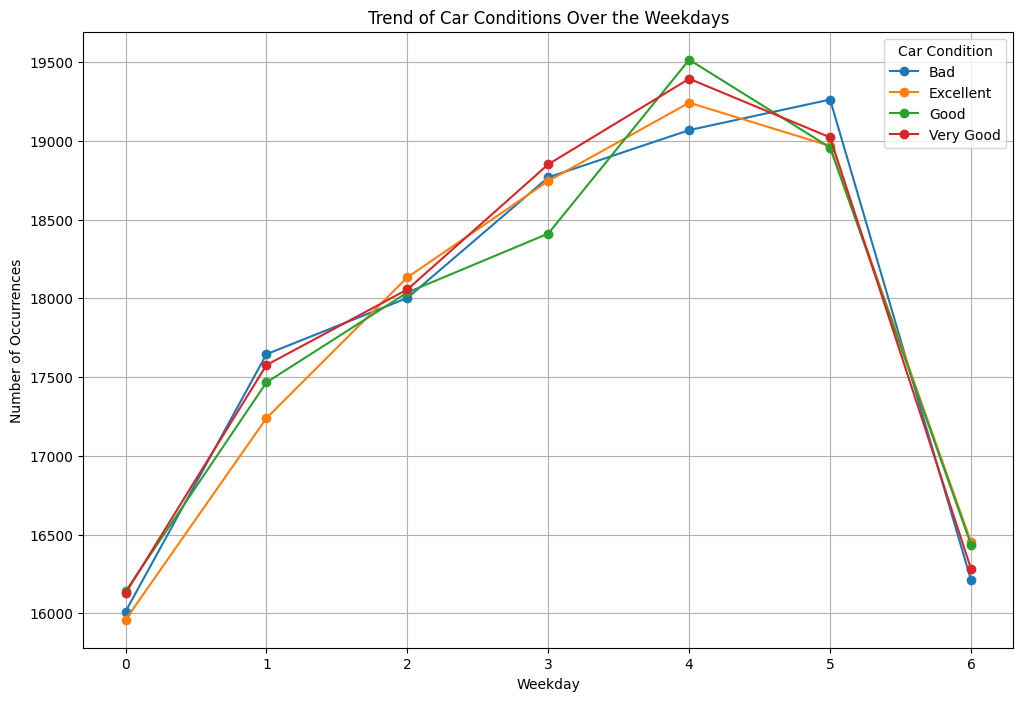

In [32]:
# Create a pivot table to count the occurrences of each car condition over the hours of the day
car_condition_trend_hour = df.pivot_table(index='hour', columns='Car Condition', aggfunc='size', fill_value=0)

# Plot the trend for each car condition over the hours of the day
plt.figure(figsize=(12, 8))
for condition in car_condition_trend_hour.columns:
    car_condition_trend_hour[condition].plot(kind='line', marker='o', label=condition)

plt.title('Trend of Car Conditions Over the Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Occurrences')
plt.legend(title='Car Condition')
plt.grid(True)
plt.show()

# Create a pivot table to count the occurrences of each car condition over the weekdays
car_condition_trend_weekday = df.pivot_table(index='weekday', columns='Car Condition', aggfunc='size', fill_value=0)

# Plot the trend for each car condition over the weekdays
plt.figure(figsize=(12, 8))
for condition in car_condition_trend_weekday.columns:
    car_condition_trend_weekday[condition].plot(kind='line', marker='o', label=condition)

plt.title('Trend of Car Conditions Over the Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Number of Occurrences')
plt.legend(title='Car Condition')
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

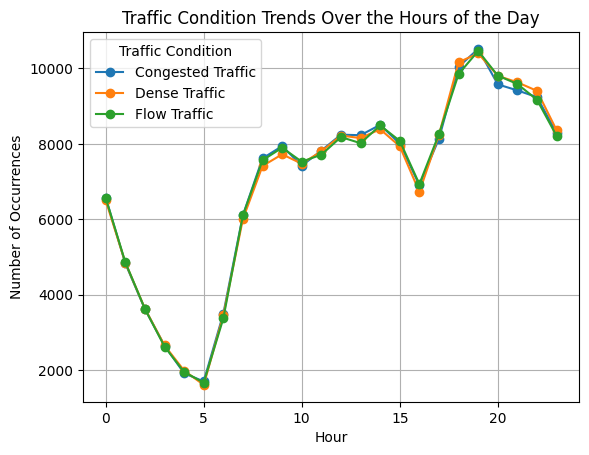

<Figure size 1200x800 with 0 Axes>

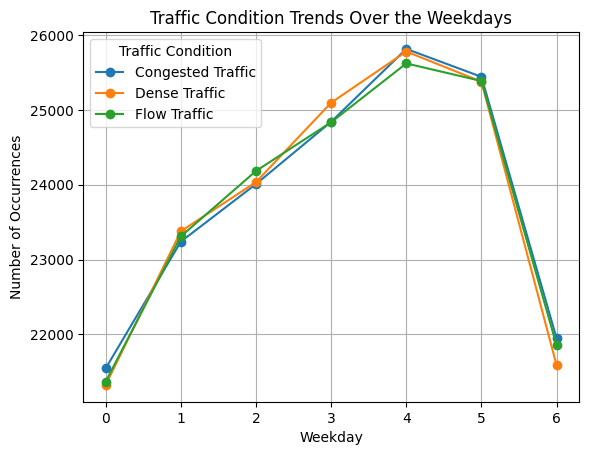

In [31]:
# Create a pivot table to count the occurrences of each traffic condition over the hours of the day
traffic_trends_hour = df.pivot_table(index='hour', columns='Traffic Condition', aggfunc='size', fill_value=0)

# Plot the traffic condition trends over the hours of the day
plt.figure(figsize=(12, 8))
traffic_trends_hour.plot(kind='line', marker='o')
plt.title('Traffic Condition Trends Over the Hours of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Occurrences')
plt.legend(title='Traffic Condition')
plt.grid(True)
plt.show()

# Create a pivot table to count the occurrences of each traffic condition over the weekdays
traffic_trends_weekday = df.pivot_table(index='weekday', columns='Traffic Condition', aggfunc='size', fill_value=0)

# Plot the traffic condition trends over the weekdays
plt.figure(figsize=(12, 8))
traffic_trends_weekday.plot(kind='line', marker='o')
plt.title('Traffic Condition Trends Over the Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Number of Occurrences')
plt.legend(title='Traffic Condition')
plt.grid(True)
plt.show()

Date Range: (Timestamp('2010-02-15 14:26:01'), Timestamp('2015-05-26 12:28:03'))

Passenger Count Statistics:
count    14.000000
mean      1.214286
std       0.425815
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: passenger_count, dtype: float64

Distance Statistics:
count    14.000000
mean      0.482179
std       1.115040
min       0.000000
25%       0.000452
50%       0.002285
75%       0.016126
max       3.184763
Name: distance, dtype: float64

Car Condition Counts:
Car Condition
Excellent    4
Very Good    4
Good         3
Bad          3
Name: count, dtype: int64

Weather Condition Counts:
Weather
windy     4
rainy     3
stormy    3
sunny     2
cloudy    2
Name: count, dtype: int64

Traffic Condition Counts:
Traffic Condition
Dense Traffic        6
Flow Traffic         6
Congested Traffic    2
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8760\3363628839.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  zero_fare_df.set_index('pickup_datetime').resample('M').size().plot(kind='line', ax=axes[2, 1], color='green')


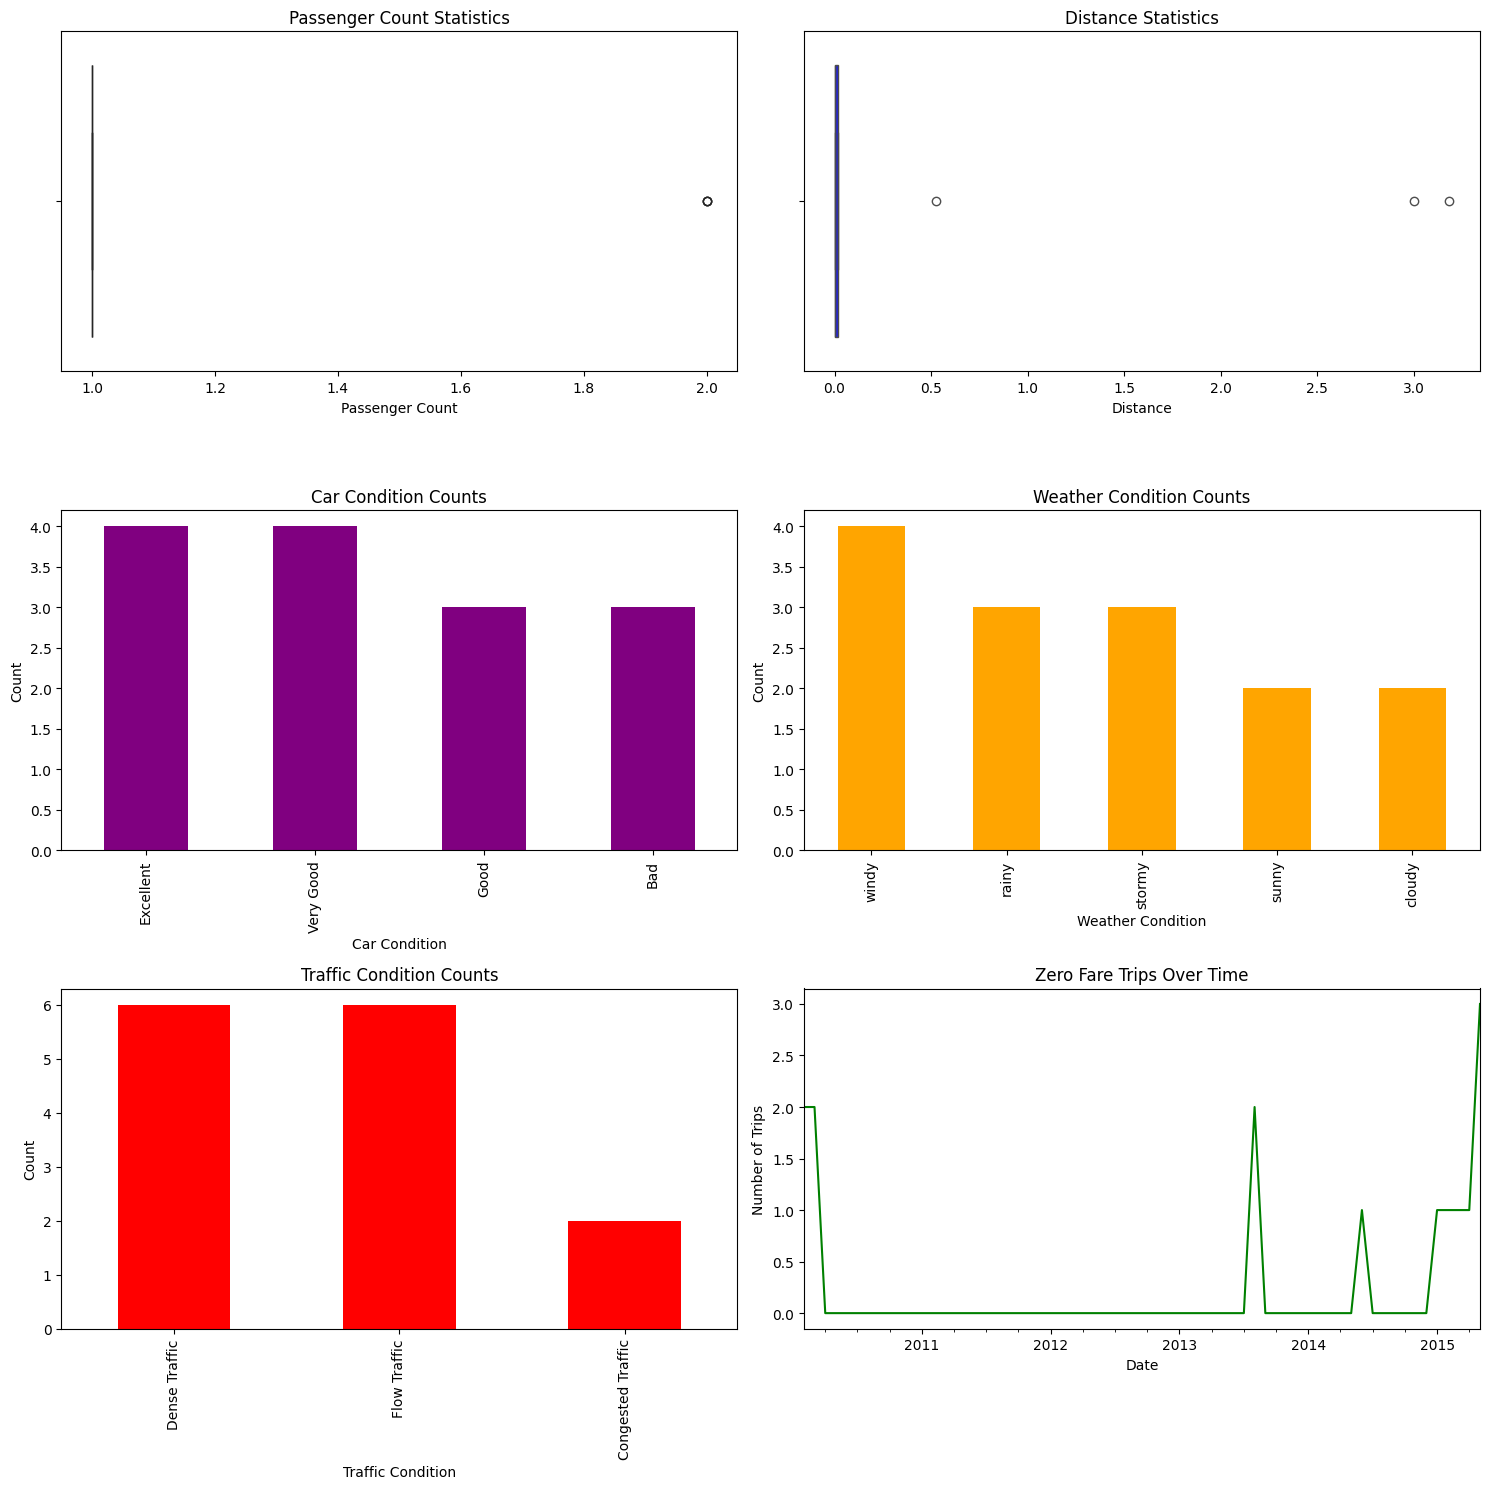

In [40]:
# Filter rows with zero fare amounts
zero_fare_df = df[df['fare_amount'] == 0]

# Analyze the date range
date_range = zero_fare_df['pickup_datetime'].min(), zero_fare_df['pickup_datetime'].max()
print(f"Date Range: {date_range}")

# Analyze passenger counts
passenger_count_stats = zero_fare_df['passenger_count'].describe()
print("\nPassenger Count Statistics:")
print(passenger_count_stats)

# Analyze distances
distance_stats = zero_fare_df['distance'].describe()
print("\nDistance Statistics:")
print(distance_stats)

# Analyze car conditions
car_condition_counts = zero_fare_df['Car Condition'].value_counts()
print("\nCar Condition Counts:")
print(car_condition_counts)

# Analyze weather conditions
weather_condition_counts = zero_fare_df['Weather'].value_counts()
print("\nWeather Condition Counts:")
print(weather_condition_counts)

# Analyze traffic conditions
traffic_condition_counts = zero_fare_df['Traffic Condition'].value_counts()
print("\nTraffic Condition Counts:")
print(traffic_condition_counts)

# Plotting the analyses
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Passenger Count Statistics
sns.boxplot(x=zero_fare_df['passenger_count'], ax=axes[0, 0], color='green')
axes[0, 0].set_title('Passenger Count Statistics')
axes[0, 0].set_xlabel('Passenger Count')

# Distance Statistics
sns.boxplot(x=zero_fare_df['distance'], ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Distance Statistics')
axes[0, 1].set_xlabel('Distance')

# Car Condition Counts
car_condition_counts.plot(kind='bar', ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Car Condition Counts')
axes[1, 0].set_xlabel('Car Condition')
axes[1, 0].set_ylabel('Count')

# Weather Condition Counts
weather_condition_counts.plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Weather Condition Counts')
axes[1, 1].set_xlabel('Weather Condition')
axes[1, 1].set_ylabel('Count')

# Traffic Condition Counts
traffic_condition_counts.plot(kind='bar', ax=axes[2, 0], color='red')
axes[2, 0].set_title('Traffic Condition Counts')
axes[2, 0].set_xlabel('Traffic Condition')
axes[2, 0].set_ylabel('Count')

# Plotting the date range as a line plot
zero_fare_df.set_index('pickup_datetime').resample('M').size().plot(kind='line', ax=axes[2, 1], color='green')
axes[2, 1].set_title('Zero Fare Trips Over Time')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()

Date Range: (Timestamp('2010-11-13 13:35:52'), Timestamp('2015-06-04 22:32:10'))

Fare Amount Statistics:
count    1732.000000
mean        8.132506
std         3.885160
min         2.500000
25%         5.300000
50%         7.300000
75%        10.100000
max        22.100000
Name: fare_amount, dtype: float64

Distance Statistics:
count    1698.000000
mean        2.350502
std         1.649627
min         0.000000
25%         1.123192
50%         1.891055
75%         3.123493
max         7.776576
Name: distance, dtype: float64

Car Condition Counts:
Car Condition
Good         486
Very Good    439
Excellent    435
Bad          431
Name: count, dtype: int64

Weather Condition Counts:
Weather
sunny     391
windy     363
rainy     356
cloudy    347
stormy    334
Name: count, dtype: int64

Traffic Condition Counts:
Traffic Condition
Congested Traffic    613
Flow Traffic         602
Dense Traffic        576
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8760\898754848.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  zero_passenger_df.set_index('pickup_datetime').resample('M').size().plot(kind='line', ax=axes[2, 1], color='green')


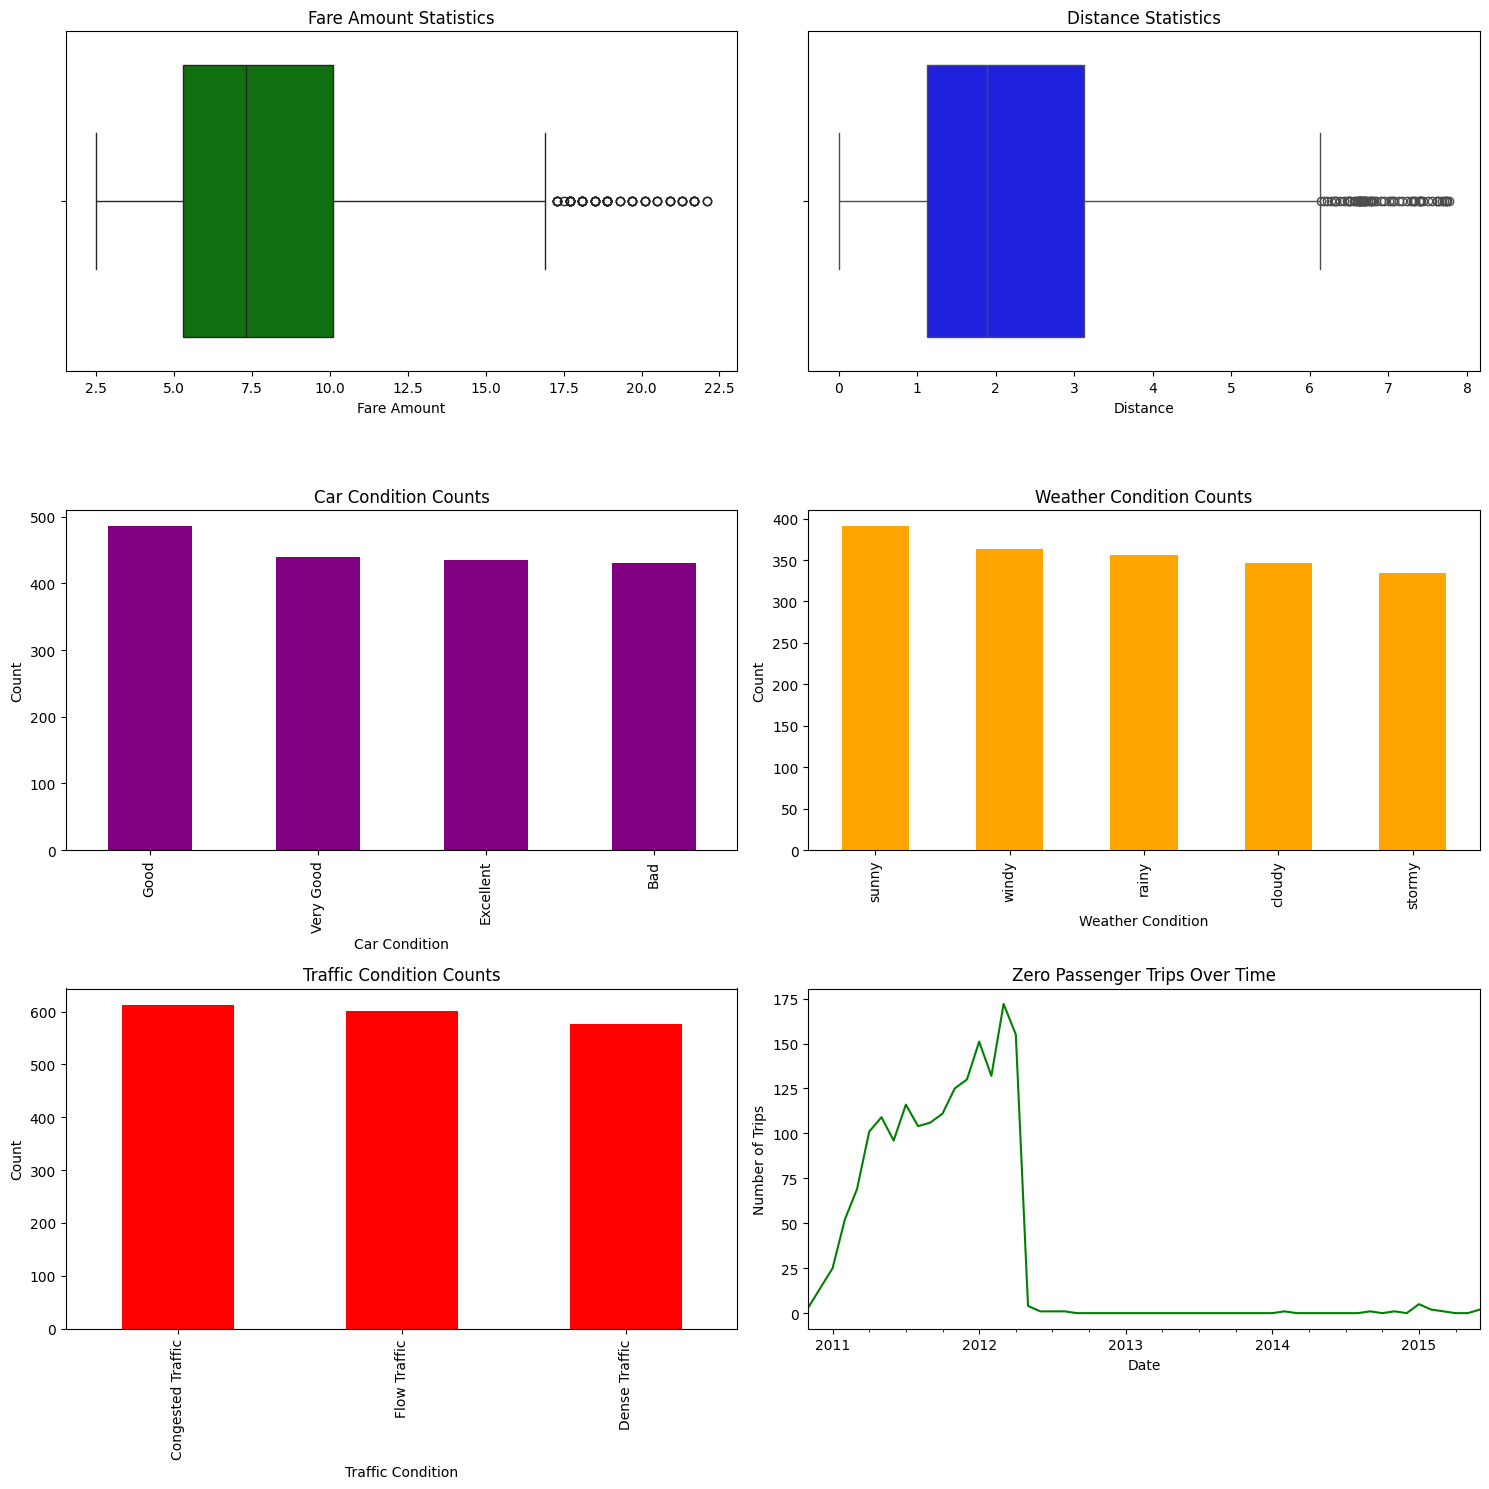

In [35]:
# Filter rows with zero passenger counts
zero_passenger_df = df[df['passenger_count'] == 0]

# Analyze the date range
date_range = zero_passenger_df['pickup_datetime'].min(), zero_passenger_df['pickup_datetime'].max()
print(f"Date Range: {date_range}")

# Analyze fare amounts
fare_amount_stats = zero_passenger_df['fare_amount'].describe()
print("\nFare Amount Statistics:")
print(fare_amount_stats)

# Analyze distances
distance_stats = zero_passenger_df['distance'].describe()
print("\nDistance Statistics:")
print(distance_stats)

# Analyze car conditions
car_condition_counts = zero_passenger_df['Car Condition'].value_counts()
print("\nCar Condition Counts:")
print(car_condition_counts)

# Analyze weather conditions
weather_condition_counts = zero_passenger_df['Weather'].value_counts()
print("\nWeather Condition Counts:")
print(weather_condition_counts)

# Analyze traffic conditions
traffic_condition_counts = zero_passenger_df['Traffic Condition'].value_counts()
print("\nTraffic Condition Counts:")
print(traffic_condition_counts)

# Plotting the analyses
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Fare Amount Statistics
sns.boxplot(x=zero_passenger_df['fare_amount'], ax=axes[0, 0], color='green')
axes[0, 0].set_title('Fare Amount Statistics')
axes[0, 0].set_xlabel('Fare Amount')

# Distance Statistics
sns.boxplot(x=zero_passenger_df['distance'], ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Distance Statistics')
axes[0, 1].set_xlabel('Distance')

# Car Condition Counts
car_condition_counts.plot(kind='bar', ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Car Condition Counts')
axes[1, 0].set_xlabel('Car Condition')
axes[1, 0].set_ylabel('Count')

# Weather Condition Counts
weather_condition_counts.plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Weather Condition Counts')
axes[1, 1].set_xlabel('Weather Condition')
axes[1, 1].set_ylabel('Count')

# Traffic Condition Counts
traffic_condition_counts.plot(kind='bar', ax=axes[2, 0], color='red')
axes[2, 0].set_title('Traffic Condition Counts')
axes[2, 0].set_xlabel('Traffic Condition')
axes[2, 0].set_ylabel('Count')

# Plotting the date range as a line plot
zero_passenger_df.set_index('pickup_datetime').resample('M').size().plot(kind='line', ax=axes[2, 1], color='green')
axes[2, 1].set_title('Zero Passenger Trips Over Time')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()

Date Range: (Timestamp('2009-01-01 17:23:09'), Timestamp('2015-06-30 20:03:23'))

Fare Amount Statistics:
count    12916.000000
mean         8.223020
std          4.128566
min          0.000000
25%          5.300000
50%          7.300000
75%         10.100000
max         22.200000
Name: fare_amount, dtype: float64

Passenger Count Statistics:
count    12695.000000
mean         1.243639
std          0.530273
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: passenger_count, dtype: float64

Car Condition Counts:
Car Condition
Very Good    3603
Good         3564
Bad          3558
Excellent    3525
Name: count, dtype: int64

Weather Condition Counts:
Weather
cloudy    2957
stormy    2849
windy     2845
sunny     2813
rainy     2786
Name: count, dtype: int64

Traffic Condition Counts:
Traffic Condition
Dense Traffic        4800
Flow Traffic         4739
Congested Traffic    4711
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8760\2109110052.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  zero_distance_df.set_index('pickup_datetime').resample('M').size().plot(kind='line', ax=axes[2, 1], color='green')


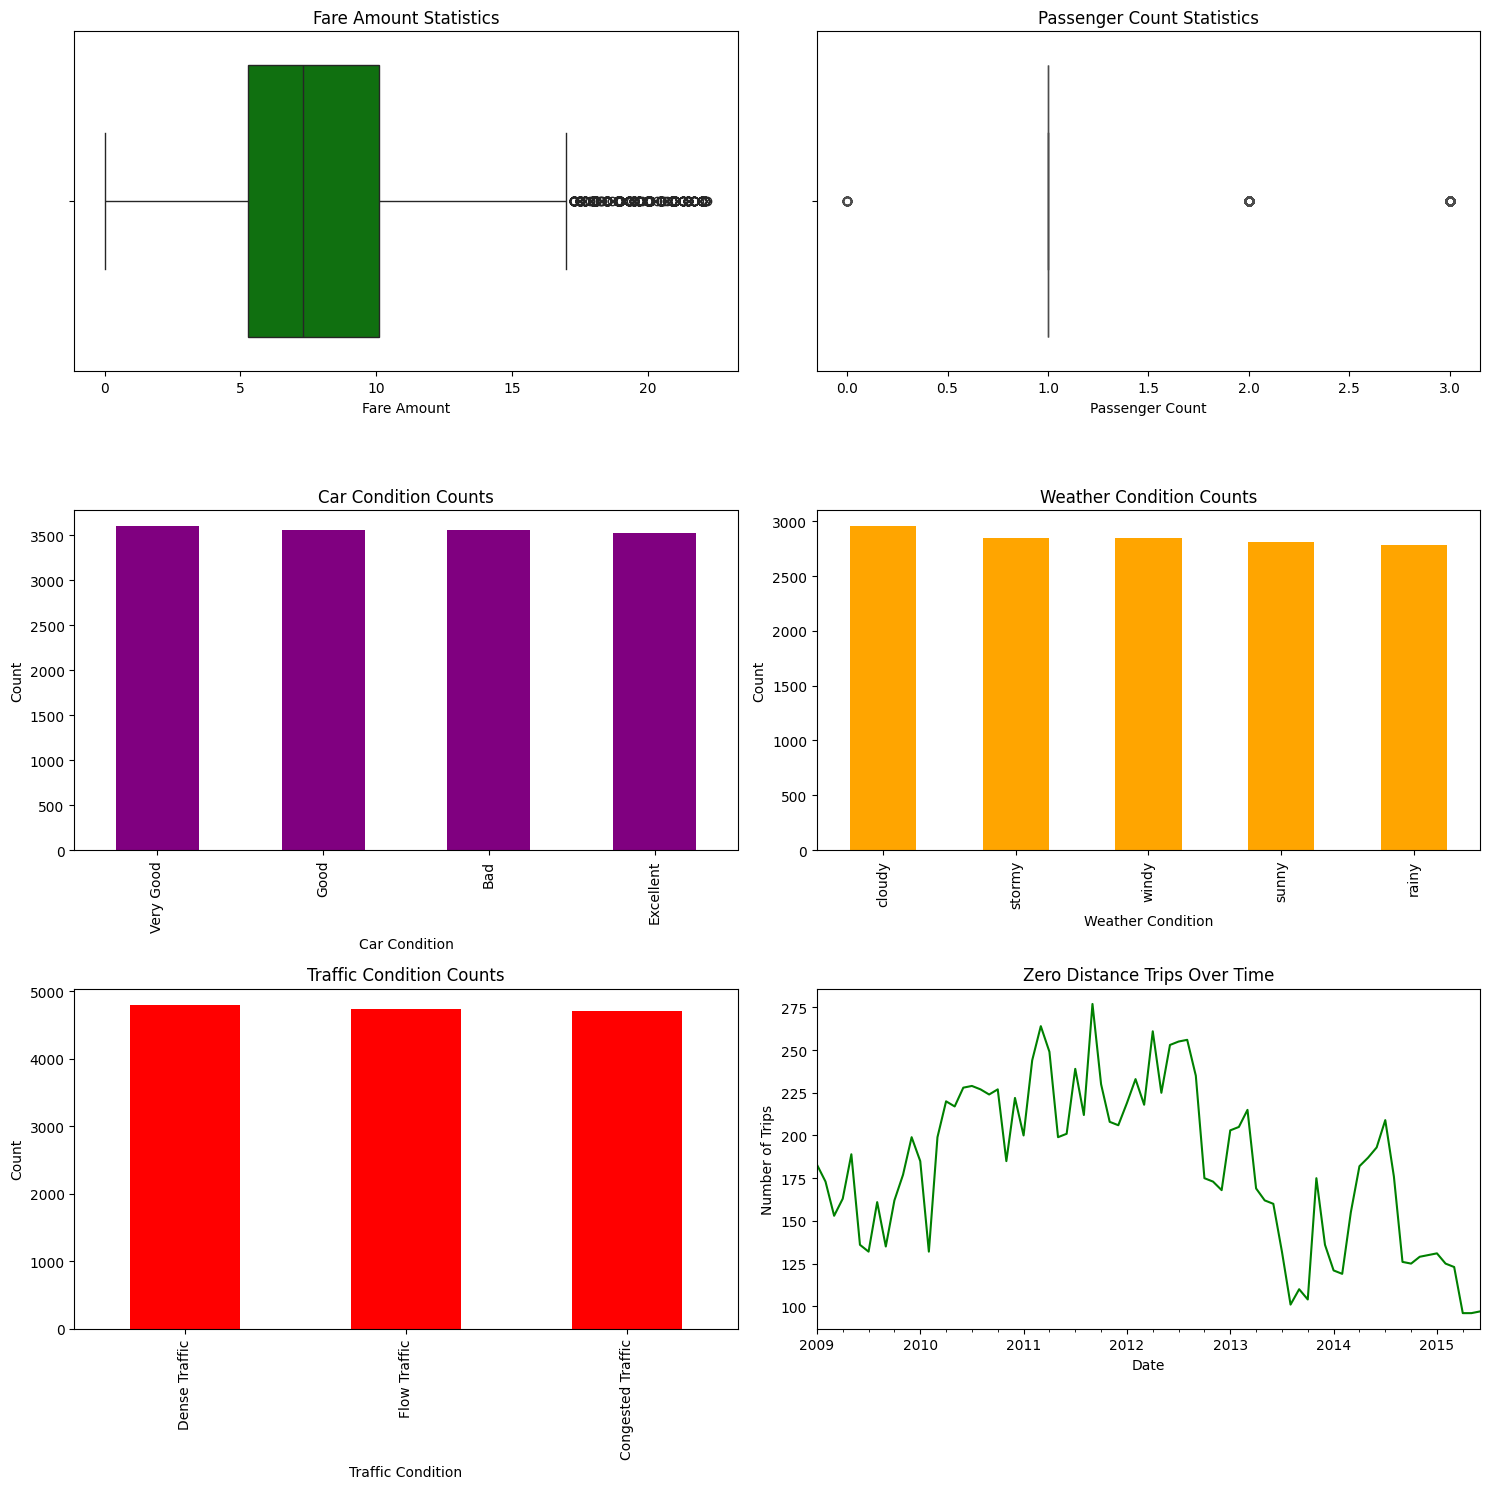

In [39]:
# Filter rows with zero distance
zero_distance_df = df[df['distance'] == 0]

# Analyze the date range
date_range = zero_distance_df['pickup_datetime'].min(), zero_distance_df['pickup_datetime'].max()
print(f"Date Range: {date_range}")

# Analyze fare amounts
fare_amount_stats_distance = zero_distance_df['fare_amount'].describe()
print("\nFare Amount Statistics:")
print(fare_amount_stats_distance)

# Analyze passenger counts
passenger_count_stats_distance = zero_distance_df['passenger_count'].describe()
print("\nPassenger Count Statistics:")
print(passenger_count_stats_distance)

# Analyze car conditions
car_condition_counts = zero_distance_df['Car Condition'].value_counts()
print("\nCar Condition Counts:")
print(car_condition_counts)

# Analyze weather conditions
weather_condition_counts_distance = zero_distance_df['Weather'].value_counts()
print("\nWeather Condition Counts:")
print(weather_condition_counts_distance)

# Analyze traffic conditions
traffic_condition_counts_distance = zero_distance_df['Traffic Condition'].value_counts()
print("\nTraffic Condition Counts:")
print(traffic_condition_counts_distance)

# Plotting the analyses
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Fare Amount Statistics
sns.boxplot(x=zero_distance_df['fare_amount'], ax=axes[0, 0], color='green')
axes[0, 0].set_title('Fare Amount Statistics')
axes[0, 0].set_xlabel('Fare Amount')

# Passenger Count Statistics
sns.boxplot(x=zero_distance_df['passenger_count'], ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Passenger Count Statistics')
axes[0, 1].set_xlabel('Passenger Count')

# Car Condition Counts
car_condition_counts.plot(kind='bar', ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Car Condition Counts')
axes[1, 0].set_xlabel('Car Condition')
axes[1, 0].set_ylabel('Count')

# Weather Condition Counts
weather_condition_counts_distance.plot(kind='bar', ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Weather Condition Counts')
axes[1, 1].set_xlabel('Weather Condition')
axes[1, 1].set_ylabel('Count')

# Traffic Condition Counts
traffic_condition_counts_distance.plot(kind='bar', ax=axes[2, 0], color='red')
axes[2, 0].set_title('Traffic Condition Counts')
axes[2, 0].set_xlabel('Traffic Condition')
axes[2, 0].set_ylabel('Count')

# Plotting the date range as a line plot
zero_distance_df.set_index('pickup_datetime').resample('M').size().plot(kind='line', ax=axes[2, 1], color='green')
axes[2, 1].set_title('Zero Distance Trips Over Time')
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Number of Trips')

plt.tight_layout()
plt.show()